# EDA: Lets see whats working so far!

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api
import collections
from sklearn import preprocessing
from datetime import datetime
from sklearn import cluster

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HPE BA Competition/2_data.csv")
metadata = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/HPE BA Competition/1_data_dictionary.xlsx")
df.head(10)

,Date,Campaign ID,Campaign Goal Code,Campaign Ad ID,Ad Digital Channel,Ad channel partner,Ad Device,Ad Group,Ad Content ID,Ad Content Type,...,$ Spend,# Impressions,# Clicks,# Video Completes,# Social Likes,# Social Shares,# Web Visit,# Collateral View,# Product View,# Form Complete
0,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Tablets,18.0,NaN,Text,...,0,0,0,0,0,0,0,0,0,0
1,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,NaN,Text,...,25,72,50,0,0,0,0,0,0,0
2,1/11/2023,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,NaN,Text,...,0,0,0,0,0,0,0,0,0,0
3,1/11/2023,3,Intent to Buy,921,Search,Channel Partner 1,Computers,18.0,NaN,Text,...,0,0,0,0,0,0,0,0,0,0
4,1/11/2023,3,Intent to Buy,921,Search,Channel Partner 1,Computers,20.0,NaN,Text,...,10,6,5,0,0,0,1,0,0,0
5,2/10/2023,3,Intent to Buy,921,Search,Channel Partner 1,Mobile,10.0,NaN,Text,...,9,537,0,0,0,0,0,0,0,0
6,12/6/2022,1,Engagement,901,Search,Channel Partner 1,Mobile,27.0,NaN,Text,...,0,0,0,0,0,0,0,0,0,0
7,12/26/2022,1,Engagement,901,Search,Channel Partner 1,Mobile,27.0,NaN,Text,...,6,65,0,0,0,0,0,0,0,0
8,12/29/2022,1,Engagement,901,Search,Channel Partner 1,Mobile,27.0,NaN,Text,...,3,0,0,0,0,0,0,0,0,0
9,12/24/2022,5,Engagement,47,Social,Channel Partner 2,NaN,NaN,85.0,Image,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
metadata

,Variable Category,Variable Name,Description
0,Timestamp,Date,the date when the metrics data is collected
1,Campaign,Campaign ID,id of campaign
2,Campaign,Campaign Goal Code,goal code of campaign
3,Ad,Campaign Ad ID,id of ad used in the campaign
4,Ad,Ad Digital Channel,digital channel used to display the ad
5,Ad,Ad channel partner,media property used to display the ad
6,Ad,Ad Device,"device displaying ad: 'Mobile', 'Computers', '..."
7,Ad,Ad Group,the group of keyword/phrase used for triggerin...
8,Ad,Ad Content ID,id of content/message used in the ad
9,Ad,Ad Content Type,type of content/message used in the ad


## Goal is to to identify the optimal budget plan for each digital channel and each audience type. Here, we have access to historical data on:
1. ads displayed in different digital channels
2. ad costs
3. reached audience
4. Response to ad

In [ ]:
df.describe()

,Campaign ID,Campaign Ad ID,Ad Group,Ad Content ID,$ Spend,# Impressions,# Clicks,# Video Completes,# Social Likes,# Social Shares,# Web Visit,# Collateral View,# Product View,# Form Complete
count,379139.000000,379139.000000,121221.000000,235150.000000,379139.000000,379139.000000,379139.000000,379139.000000,379139.000000,379139.000000,379139.000000,379139.000000,379139.000000,379139.000000
mean,2.953270,567.661515,16.491276,49.505324,17.677016,4167.014443,969.706335,64.848143,0.023846,0.001047,0.355200,0.035705,0.043654,0.000198
std,1.403029,272.930785,11.398192,26.652174,23.267288,10821.393338,4918.847417,590.190888,0.375018,0.094119,2.702422,0.639808,0.691292,0.041245
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,343.000000,3.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,534.000000,18.000000,53.000000,7.000000,214.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,876.000000,28.000000,72.000000,28.000000,2950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,1018.000000,31.000000,91.000000,183.000000,411247.000000,277500.000000,28392.000000,32.000000,45.000000,289.000000,77.000000,63.000000,16.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379139 entries, 0 to 379138
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                379139 non-null  object 
 1   Campaign ID         379139 non-null  int64  
 2   Campaign Goal Code  379139 non-null  object 
 3   Campaign Ad ID      379139 non-null  int64  
 4   Ad Digital Channel  379139 non-null  object 
 5   Ad channel partner  379139 non-null  object 
 6   Ad Device           121221 non-null  object 
 7   Ad Group            121221 non-null  float64
 8   Ad Content ID       235150 non-null  float64
 9   Ad Content Type     379042 non-null  object 
 10  Audience Type       379139 non-null  object 
 11  $ Spend             379139 non-null  int64  
 12  # Impressions       379139 non-null  int64  
 13  # Clicks            379139 non-null  int64  
 14  # Video Completes   379139 non-null  int64  
 15  # Social Likes      379139 non-nul

In [ ]:
df.duplicated().sum()

39128

In [ ]:
df.drop_duplicates(inplace = True)

## Columns with null values:
1. Ad Device
2. Ad Group
3. Ad Content ID

In [ ]:
df['Audience Type'].unique()

array(['Audience Type 1', 'Audience Type 2', 'Audience Type 3',
       'Audience Type 4', 'Audience Type 5'], dtype=object)

In [ ]:
df['Campaign ID'].unique()

array([3, 1, 5, 4, 2])

In [ ]:
len(df['Campaign Ad ID'].unique())

1018

In [ ]:
for i in df['Campaign ID'].unique():
  print(f"For Campaign ID = {i} the number of Unique ads = {len(df[ df['Campaign ID'] == i]['Campaign Ad ID'].unique())} and the number of Rows are {len(df[ df['Campaign ID'] == i])}")

For Campaign ID = 3 the number of Unique ads = 351 and the number of Rows are 90285
For Campaign ID = 1 the number of Unique ads = 426 and the number of Rows are 69655
For Campaign ID = 5 the number of Unique ads = 301 and the number of Rows are 70453
For Campaign ID = 4 the number of Unique ads = 402 and the number of Rows are 50296
For Campaign ID = 2 the number of Unique ads = 306 and the number of Rows are 59322


In [ ]:
df['Ad Digital Channel'].unique()

array(['Search', 'Social', 'Programmatic Display'], dtype=object)

In [ ]:
df['Ad channel partner'].unique()

array(['Channel Partner 1', 'Channel Partner 2', 'Channel Partner 3',
       'Channel Partner 4', 'Channel Partner 5', 'Channel Partner 6',
       'Channel Partner 7', 'Channel Partner 9'], dtype=object)

In [ ]:
for i in df.columns:
  print(f"There are {len(df[i].unique())} unique rows for the variable {i}")

There are 234 unique rows for the variable Date
There are 5 unique rows for the variable Campaign ID
There are 5 unique rows for the variable Campaign Goal Code
There are 1018 unique rows for the variable Campaign Ad ID
There are 3 unique rows for the variable Ad Digital Channel
There are 8 unique rows for the variable Ad channel partner
There are 4 unique rows for the variable Ad Device
There are 32 unique rows for the variable Ad Group
There are 92 unique rows for the variable Ad Content ID
There are 4 unique rows for the variable Ad Content Type
There are 5 unique rows for the variable Audience Type
There are 175 unique rows for the variable $ Spend
There are 35145 unique rows for the variable # Impressions
There are 769 unique rows for the variable # Clicks
There are 4577 unique rows for the variable # Video Completes
There are 30 unique rows for the variable # Social Likes
There are 12 unique rows for the variable # Social Shares
There are 100 unique rows for the variable # Web Vi

In [ ]:
df.head(2)

,Date,Campaign ID,Campaign Goal Code,Campaign Ad ID,Ad Digital Channel,Ad channel partner,Ad Device,Ad Group,Ad Content ID,Ad Content Type,...,$ Spend,# Impressions,# Clicks,# Video Completes,# Social Likes,# Social Shares,# Web Visit,# Collateral View,# Product View,# Form Complete
0,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Tablets,18.0,NaN,Text,...,0,0,0,0,0,0,0,0,0,0
1,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,NaN,Text,...,25,72,50,0,0,0,0,0,0,0


Goal: Form a model to allocate marketing budget to three Channels and five audience types

Understanding data with respect to each Channel

In [ ]:
df_search = df[ df['Ad Digital Channel'] == "Search"]
df_prog = df[ df['Ad Digital Channel'] == "Programmatic Display"]
df_social = df[ df['Ad Digital Channel'] == "Social" ]

In [ ]:
df_search.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83028 entries, 0 to 379129
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                83028 non-null  object 
 1   Campaign ID         83028 non-null  int64  
 2   Campaign Goal Code  83028 non-null  object 
 3   Campaign Ad ID      83028 non-null  int64  
 4   Ad Digital Channel  83028 non-null  object 
 5   Ad channel partner  83028 non-null  object 
 6   Ad Device           83028 non-null  object 
 7   Ad Group            83028 non-null  float64
 8   Ad Content ID       0 non-null      float64
 9   Ad Content Type     83028 non-null  object 
 10  Audience Type       83028 non-null  object 
 11  $ Spend             83028 non-null  int64  
 12  # Impressions       83028 non-null  int64  
 13  # Clicks            83028 non-null  int64  
 14  # Video Completes   83028 non-null  int64  
 15  # Social Likes      83028 non-null  int64  
 16  # S

Ad Content ID is missing as it is NA for Search type Channel

In [ ]:
df_prog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223503 entries, 13 to 379138
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                223503 non-null  object 
 1   Campaign ID         223503 non-null  int64  
 2   Campaign Goal Code  223503 non-null  object 
 3   Campaign Ad ID      223503 non-null  int64  
 4   Ad Digital Channel  223503 non-null  object 
 5   Ad channel partner  223503 non-null  object 
 6   Ad Device           0 non-null       object 
 7   Ad Group            0 non-null       float64
 8   Ad Content ID       213499 non-null  float64
 9   Ad Content Type     223406 non-null  object 
 10  Audience Type       223503 non-null  object 
 11  $ Spend             223503 non-null  int64  
 12  # Impressions       223503 non-null  int64  
 13  # Clicks            223503 non-null  int64  
 14  # Video Completes   223503 non-null  int64  
 15  # Social Likes      223503 non-nu

Ad Device, and Ad Group only applied to Search type channel. Hence, all nulls

Ad Content type ID has some missing values which needs to be looked into

In [ ]:
df_social.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33480 entries, 9 to 379093
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                33480 non-null  object 
 1   Campaign ID         33480 non-null  int64  
 2   Campaign Goal Code  33480 non-null  object 
 3   Campaign Ad ID      33480 non-null  int64  
 4   Ad Digital Channel  33480 non-null  object 
 5   Ad channel partner  33480 non-null  object 
 6   Ad Device           0 non-null      object 
 7   Ad Group            0 non-null      float64
 8   Ad Content ID       20941 non-null  float64
 9   Ad Content Type     33480 non-null  object 
 10  Audience Type       33480 non-null  object 
 11  $ Spend             33480 non-null  int64  
 12  # Impressions       33480 non-null  int64  
 13  # Clicks            33480 non-null  int64  
 14  # Video Completes   33480 non-null  int64  
 15  # Social Likes      33480 non-null  int64  
 16  # S

Similar to Programmatic type channel

### Characteristics of Search ads: 
1. Number of Impressions
2. Number of Clicks
3. Cost/Click and Cost/Action with differing ideas of an action
4. Click through rate = Number of Clicks/Number of Impressions
5. CTR by Ad groups and CTR by Ad Campaigns

In [ ]:
for i in df_search['Campaign ID'].unique():
  print(f"Number of Unique Ad ID's in Campaign ID {i} is {len(df_search[ df['Campaign ID'] == i]['Campaign Ad ID'].unique())}")
print(f"Total number of Search Ad Campaigns = {len(df_search['Campaign Ad ID'].unique())}")

Number of Unique Ad ID's in Campaign ID 3 is 22
Number of Unique Ad ID's in Campaign ID 1 is 29
Number of Unique Ad ID's in Campaign ID 2 is 22
Number of Unique Ad ID's in Campaign ID 5 is 12
Number of Unique Ad ID's in Campaign ID 4 is 20
Total number of Search Ad Campaigns = 71


<ipython-input-22-e753ea1e6f62>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f"Number of Unique Ad ID's in Campaign ID {i} is {len(df_search[ df['Campaign ID'] == i]['Campaign Ad ID'].unique())}")


Hence, there are some overlapping Ads used for multiple Campaigns: </br>
Look into the individual ads first for each campaign to identify differences, and then look into the common ads

In [ ]:
for i in df_search['Campaign ID'].unique():
  vars()['Campaignads_' + str(i)] = df_search[ df['Campaign ID'] == i]['Campaign Ad ID'].unique()

<ipython-input-23-f5e33ae6b209>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vars()['Campaignads_' + str(i)] = df_search[ df['Campaign ID'] == i]['Campaign Ad ID'].unique()


In [ ]:
Common_ads = list( set(Campaignads_1).intersection(Campaignads_2, Campaignads_3, Campaignads_4, Campaignads_5) )
Common_ads

[866, 870, 873, 874, 875, 876, 877, 878]

In [ ]:
for i in Common_ads:
  Campaignads_1 = np.delete(Campaignads_1, np.where(Campaignads_1 == i))
  Campaignads_2 = np.delete(Campaignads_2, np.where(Campaignads_1 == i))
  Campaignads_3 = np.delete(Campaignads_3, np.where(Campaignads_1 == i))
  Campaignads_4 = np.delete(Campaignads_4, np.where(Campaignads_1 == i))
  Campaignads_5 = np.delete(Campaignads_5, np.where(Campaignads_1 == i))
  

In [ ]:
df_scamp1= df_search[ df_search['Campaign Ad ID'].isin(Campaignads_1) ]
df_scamp2 = df_search[ df_search['Campaign Ad ID'].isin(Campaignads_2) ]
df_scamp3 = df_search[ df_search['Campaign Ad ID'].isin(Campaignads_3) ]
df_scamp4 = df_search[ df_search['Campaign Ad ID'].isin(Campaignads_4) ]
df_scamp5 = df_search[ df_search['Campaign Ad ID'].isin(Campaignads_5) ]

In [ ]:
df_scamp1['Datetime'] = df_scamp1.apply(lambda x : datetime.strptime(x['Date'], "%m/%d/%Y"), axis = 1)
df_scamp2['Datetime'] = df_scamp2.apply(lambda x : datetime.strptime(x['Date'], "%m/%d/%Y"), axis = 1)
df_scamp3['Datetime'] = df_scamp3.apply(lambda x : datetime.strptime(x['Date'], "%m/%d/%Y"), axis = 1)
df_scamp4['Datetime'] = df_scamp4.apply(lambda x : datetime.strptime(x['Date'], "%m/%d/%Y"), axis = 1)
df_scamp5['Datetime'] = df_scamp5.apply(lambda x : datetime.strptime(x['Date'], "%m/%d/%Y"), axis = 1)

<ipython-input-27-54400cfe51d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scamp1['Datetime'] = df_scamp1.apply(lambda x : datetime.strptime(x['Date'], "%m/%d/%Y"), axis = 1)
<ipython-input-27-54400cfe51d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scamp2['Datetime'] = df_scamp2.apply(lambda x : datetime.strptime(x['Date'], "%m/%d/%Y"), axis = 1)
<ipython-input-27-54400cfe51d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [ ]:
j = 0
for i in [df_scamp1, df_scamp2, df_scamp3, df_scamp4, df_scamp5]:
  j = j+1
  length = ( max(i["Datetime"]) - min(i['Datetime']) ).days
  print(f"Campaign ID {j} was about {length} days long")

Campaign ID 1 was about 107 days long
Campaign ID 2 was about 225 days long
Campaign ID 3 was about 225 days long
Campaign ID 4 was about 225 days long
Campaign ID 5 was about 225 days long


<AxesSubplot:>

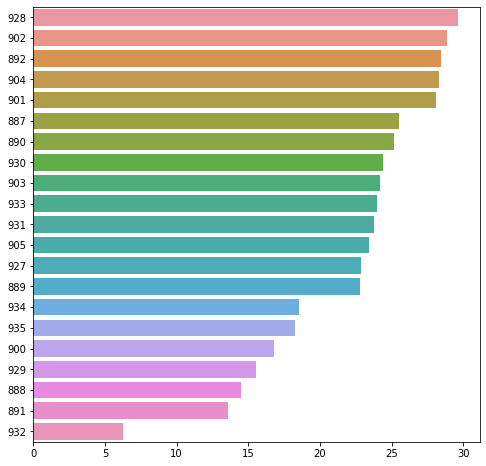

In [ ]:
avg_Cost = dict()
for i in df_scamp1['Campaign Ad ID'].unique():
  average_cost = np.average(df_scamp1[ df_scamp1['Campaign Ad ID']== i ]['$ Spend'])
  avg_Cost[str(i)] = average_cost

avg_Cost = sorted(avg_Cost.items(), key=lambda kv: kv[1], reverse= True)
sorted_avgcost = collections.OrderedDict(avg_Cost)

plt.figure(figsize = (8,8))
sns.barplot(x = list(sorted_avgcost.values()), y = list(sorted_avgcost.keys()))

<AxesSubplot:>

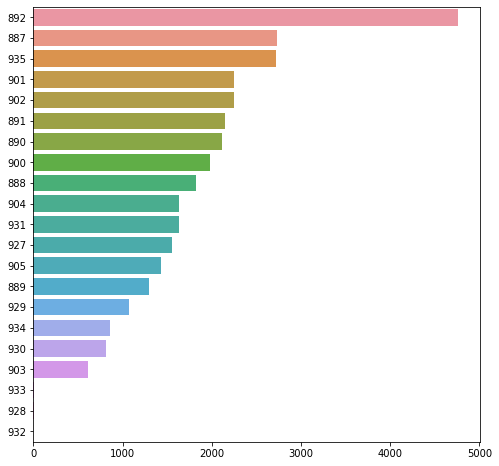

In [ ]:
avg_Imps = dict()
for i in df_scamp1['Campaign Ad ID'].unique():
  average_impressions = np.average(df_scamp1[ df_scamp1['Campaign Ad ID']== i ]['# Impressions'])
  avg_Imps[str(i)] = average_impressions

avg_Imps = sorted(avg_Imps.items(), key=lambda kv: kv[1], reverse= True)
sorted_avgimps = collections.OrderedDict(avg_Imps)

plt.figure(figsize = (8,8))
sns.barplot(x = list(sorted_avgimps.values()), y = list(sorted_avgimps.keys()))


<AxesSubplot:>

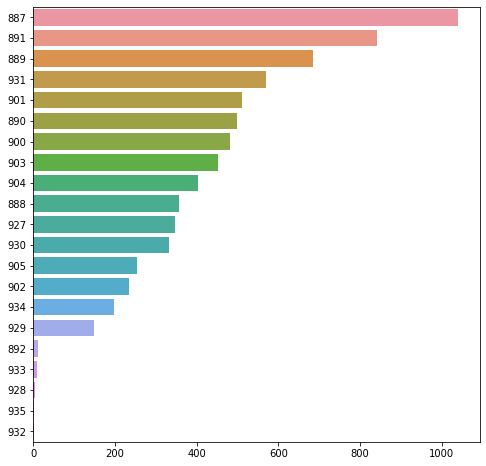

In [ ]:
avg_Clicks = dict()
for i in df_scamp1['Campaign Ad ID'].unique():
  average_clicks = np.average(df_scamp1[ df_scamp1['Campaign Ad ID']== i ]['# Clicks'])
  avg_Clicks[str(i)] = average_clicks

avg_Clicks = sorted(avg_Clicks.items(), key=lambda kv: kv[1], reverse= True)
sorted_avgclicks = collections.OrderedDict(avg_Clicks)

plt.figure(figsize = (8,8))
sns.barplot(x = list(sorted_avgclicks.values()), y = list(sorted_avgclicks.keys()))

<AxesSubplot:>

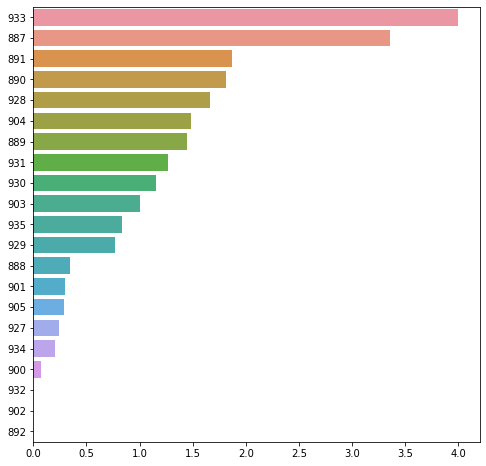

In [ ]:
avg_WebVisits = dict()
for i in df_scamp1['Campaign Ad ID'].unique():
  average_webvisits = np.average(df_scamp1[ df_scamp1['Campaign Ad ID']== i ]['# Web Visit'])
  avg_WebVisits[str(i)]= average_webvisits

avg_WebVisits = sorted(avg_WebVisits.items(), key=lambda kv: kv[1], reverse= True)
sorted_avgweb = collections.OrderedDict(avg_WebVisits)

plt.figure(figsize = (8,8))
sns.barplot(x = list(sorted_avgweb.values()), y = list(sorted_avgweb.keys()))

<AxesSubplot:>

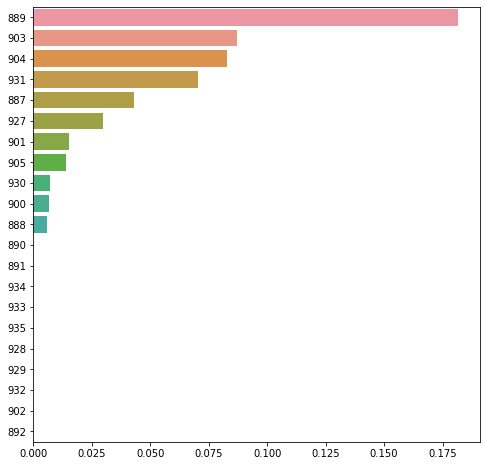

In [ ]:
avg_PV = dict()
for i in df_scamp1['Campaign Ad ID'].unique():
  average_prodview = np.average(df_scamp1[ df_scamp1['Campaign Ad ID']== i ]['# Product View'])
  avg_PV[str(i)]= average_prodview

avg_PV = sorted(avg_PV.items(), key=lambda kv: kv[1], reverse= True)
sorted_avgpv = collections.OrderedDict(avg_PV)

plt.figure(figsize = (8,8))
sns.barplot(x = list(sorted_avgpv.values()), y = list(sorted_avgpv.keys()))

<AxesSubplot:>

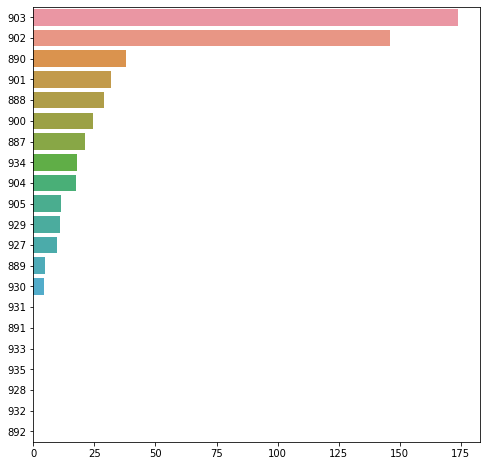

In [ ]:
avg_VC = dict()
for i in df_scamp1['Campaign Ad ID'].unique():
  average_videocompletes = np.average(df_scamp1[ df_scamp1['Campaign Ad ID']== i ]['# Video Completes'])
  avg_VC[str(i)]= average_videocompletes

avg_VC = sorted(avg_VC.items(), key=lambda kv: kv[1], reverse= True)
sorted_avgvc = collections.OrderedDict(avg_VC)

plt.figure(figsize = (8,8))
sns.barplot(x = list(sorted_avgvc.values()), y = list(sorted_avgvc.keys()))

In [ ]:
df_search['Audience Type'].unique()

array(['Audience Type 1', 'Audience Type 5'], dtype=object)

Only Audience Type 1 and Audience Type 5 targeted through Search Ads

In [ ]:
df.columns

Index(['Date', 'Campaign ID', 'Campaign Goal Code', 'Campaign Ad ID',
       'Ad Digital Channel', 'Ad channel partner', 'Ad Device', 'Ad Group',
       'Ad Content ID', 'Ad Content Type', 'Audience Type', '$ Spend',
       '# Impressions', '# Clicks', '# Video Completes', '# Social Likes',
       '# Social Shares', '# Web Visit', '# Collateral View', '# Product View',
       '# Form Complete'],
      dtype='object')

In [ ]:
df['Campaign Goal Code'].unique()

array(['Intent to Buy', 'Engagement', 'Awareness', 'Consideration',
       'Purchase'], dtype=object)

## Date

In [ ]:
df_search['Datetime'] = df_search.apply(lambda x : datetime.strptime(x['Date'], "%m/%d/%Y"), axis = 1)

<ipython-input-38-f671ac7d9544>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_search['Datetime'] = df_search.apply(lambda x : datetime.strptime(x['Date'], "%m/%d/%Y"), axis = 1)


In [ ]:
df

,Date,Campaign ID,Campaign Goal Code,Campaign Ad ID,Ad Digital Channel,Ad channel partner,Ad Device,Ad Group,Ad Content ID,Ad Content Type,...,$ Spend,# Impressions,# Clicks,# Video Completes,# Social Likes,# Social Shares,# Web Visit,# Collateral View,# Product View,# Form Complete
0,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Tablets,18.0,NaN,Text,...,0,0,0,0,0,0,0,0,0,0
1,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,NaN,Text,...,25,72,50,0,0,0,0,0,0,0
2,1/11/2023,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,NaN,Text,...,0,0,0,0,0,0,0,0,0,0
3,1/11/2023,3,Intent to Buy,921,Search,Channel Partner 1,Computers,18.0,NaN,Text,...,0,0,0,0,0,0,0,0,0,0
4,1/11/2023,3,Intent to Buy,921,Search,Channel Partner 1,Computers,20.0,NaN,Text,...,10,6,5,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379134,11/14/2022,3,Engagement,373,Programmatic Display,Channel Partner 3,NaN,NaN,53.0,Video,...,0,0,0,0,0,0,0,0,0,0
379135,1/8/2023,1,Engagement,482,Programmatic Display,Channel Partner 3,NaN,NaN,28.0,Video,...,0,0,0,0,0,0,0,0,0,0
379136,10/7/2022,1,Engagement,262,Programmatic Display,Channel Partner 3,NaN,NaN,13.0,Video,...,35,23770,0,0,0,0,0,0,0,0
379137,1/5/2023,1,Engagement,508,Programmatic Display,Channel Partner 3,NaN,NaN,28.0,Video,...,56,4419,0,0,0,0,0,0,0,0


No, clear pattern for increased or decreased ad spends based on period of the year!

In [ ]:
search_effect = dict()

for i in df_search['Campaign Goal Code'].unique():
  average_wv = np.average(df_search[ df_search['Campaign Goal Code'] == i]['# Web Visit'])
  average_clicks = np.average(df_search[ df_search['Campaign Goal Code'] == i]['# Clicks'])
  average_impressions = np.average(df_search[ df_search['Campaign Goal Code'] == i]['# Impressions'])
  average_ds = np.average(df_search[ df_search['Campaign Goal Code'] == i]['$ Spend'])
  search_effect[i] = list([average_wv, average_clicks, average_impressions, average_ds])

search_eff = pd.DataFrame(search_effect).transpose().rename({0: "# Web Visit", 1: "# Clicks", 2: "# Impressions", 3: "$ Spend"}, axis = 1).reset_index()
search_eff.rename({"index": "Campaign"}, inplace = True, axis= 1)


# **------------------------------------------------------------------------------------------**

<AxesSubplot:xlabel='Campaign', ylabel='# Web Visit'>

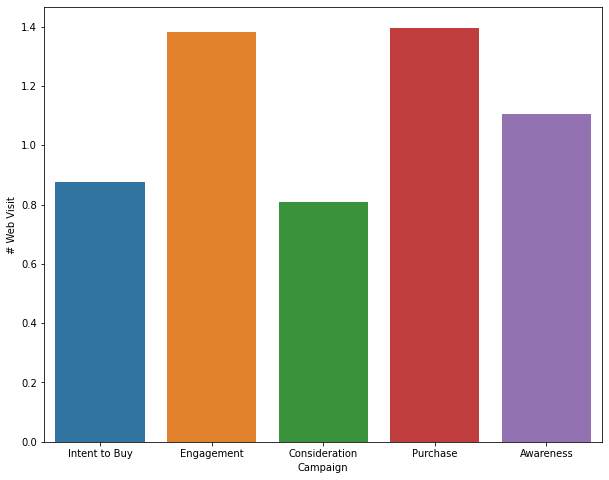

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot(x = "Campaign", y = "# Web Visit", hue_order= "$ Spend", data = search_eff)

<AxesSubplot:xlabel='Campaign', ylabel='# Impressions'>

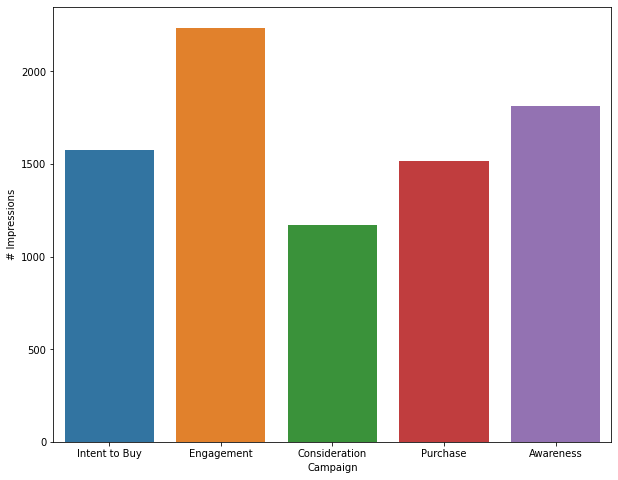

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot(x = "Campaign", y = "# Impressions", hue_order= "$ Spend", data = search_eff)

<AxesSubplot:xlabel='Campaign', ylabel='# Clicks'>

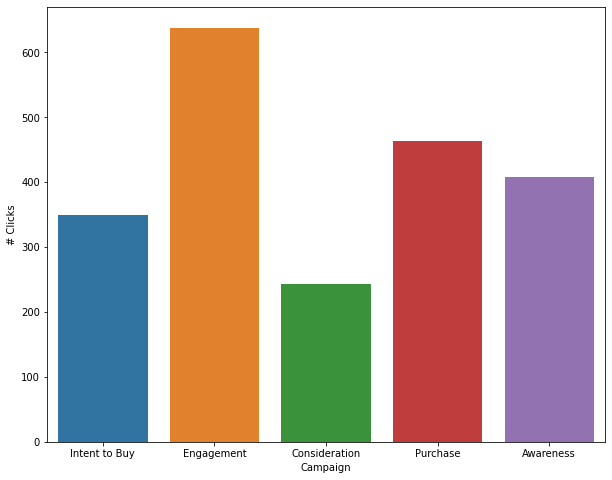

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot(x = "Campaign", y = "# Clicks", hue_order= "$ Spend", data = search_eff)

#Accessing the Cost Curves for each Channel-Audience-Campaign level

### Cost Curve- Ad spent v/s #Web visits

### Channel level

<AxesSubplot:xlabel='$ Spend', ylabel='# Collateral View'>

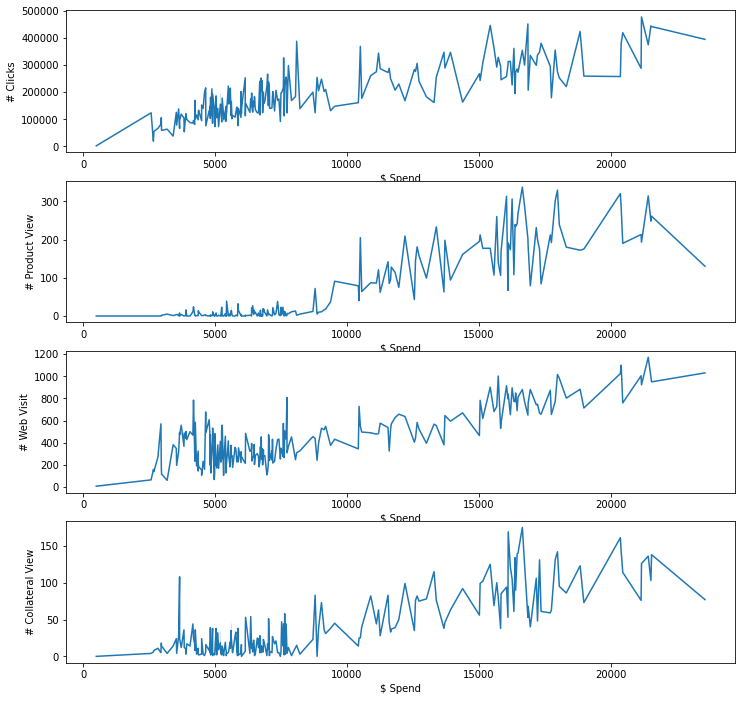

In [ ]:
df_sbydate = df_search.groupby("Datetime").sum()

fig, axs = plt.subplots(nrows = 4, figsize= (12,12))
sns.lineplot(x= df_sbydate['$ Spend'], y = df_sbydate['# Clicks'], ax = axs[0])
sns.lineplot(x= df_sbydate['$ Spend'], y = df_sbydate['# Product View'], ax = axs[1])
sns.lineplot(x= df_sbydate['$ Spend'], y = df_sbydate['# Web Visit'], ax = axs[2])
sns.lineplot(x= df_sbydate['$ Spend'], y = df_sbydate['# Collateral View'], ax = axs[3])



<AxesSubplot:xlabel='$ Spend', ylabel='# Collateral View'>

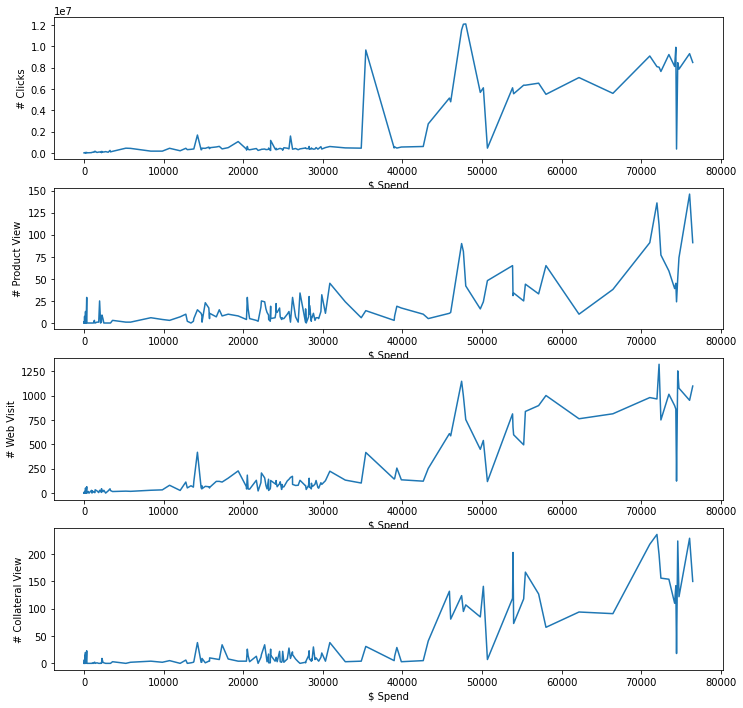

In [ ]:
df_progbydate = df_prog.groupby("Date").sum()

fig, axs = plt.subplots(nrows = 4, figsize= (12,12))
sns.lineplot(x= df_progbydate['$ Spend'], y = df_progbydate['# Clicks'], ax = axs[0])
sns.lineplot(x= df_progbydate['$ Spend'], y = df_progbydate['# Product View'], ax = axs[1])
sns.lineplot(x= df_progbydate['$ Spend'], y = df_progbydate['# Web Visit'], ax = axs[2])
sns.lineplot(x= df_progbydate['$ Spend'], y = df_progbydate['# Collateral View'], ax = axs[3])



<AxesSubplot:xlabel='$ Spend', ylabel='# Collateral View'>

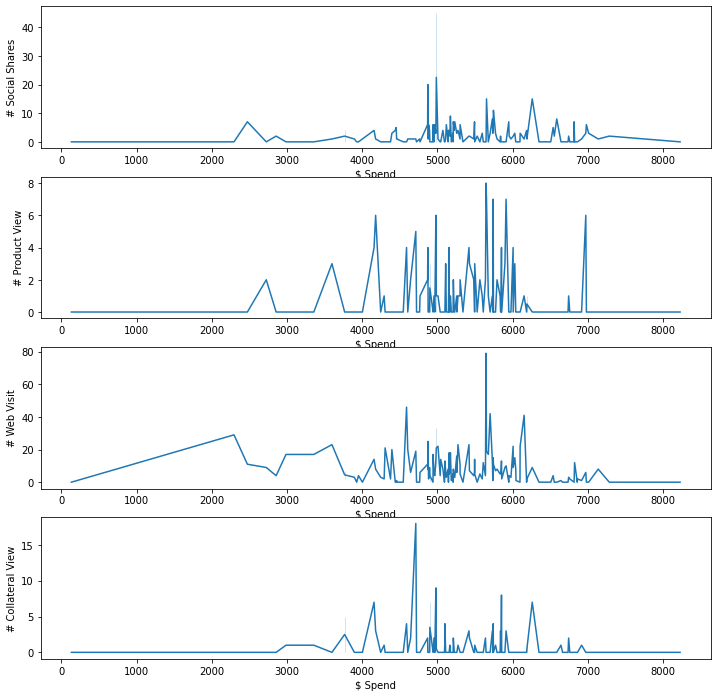

In [ ]:
df_socialbydate = df_social.groupby("Date").sum()

fig, axs = plt.subplots(nrows = 4, figsize= (12,12))
sns.lineplot(x= df_socialbydate['$ Spend'], y = df_socialbydate['# Social Shares'], ax = axs[0])
sns.lineplot(x= df_socialbydate['$ Spend'], y = df_socialbydate['# Product View'], ax = axs[1])
sns.lineplot(x= df_socialbydate['$ Spend'], y = df_socialbydate['# Web Visit'], ax = axs[2])
sns.lineplot(x= df_socialbydate['$ Spend'], y = df_socialbydate['# Collateral View'], ax = axs[3])


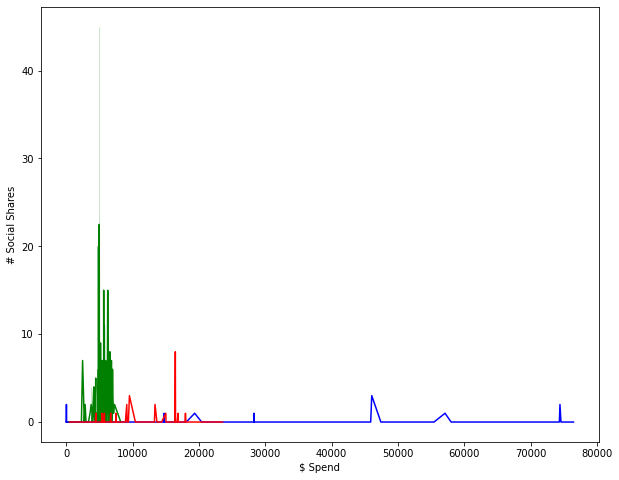

In [ ]:
ax = plt.subplots(figsize = (10,8))
ax = sns.lineplot(x= df_socialbydate['$ Spend'], y = df_socialbydate['# Social Shares'], color = "g")
ax = sns.lineplot(x= df_progbydate['$ Spend'], y = df_progbydate['# Social Shares'], color = "b")
ax = sns.lineplot(x= df_sbydate['$ Spend'], y = df_sbydate['# Social Shares'], color = "r")
plt.show()

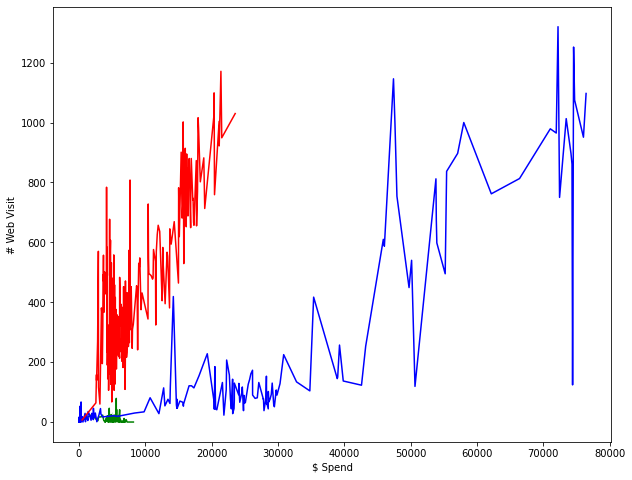

In [ ]:
ax = plt.subplots(figsize = (10,8))
ax = sns.lineplot(x= df_socialbydate['$ Spend'], y = df_socialbydate['# Web Visit'], color = "g")
ax = sns.lineplot(x= df_progbydate['$ Spend'], y = df_progbydate['# Web Visit'], color = "b")
ax = sns.lineplot(x= df_sbydate['$ Spend'], y = df_sbydate['# Web Visit'], color = "r")

plt.show()

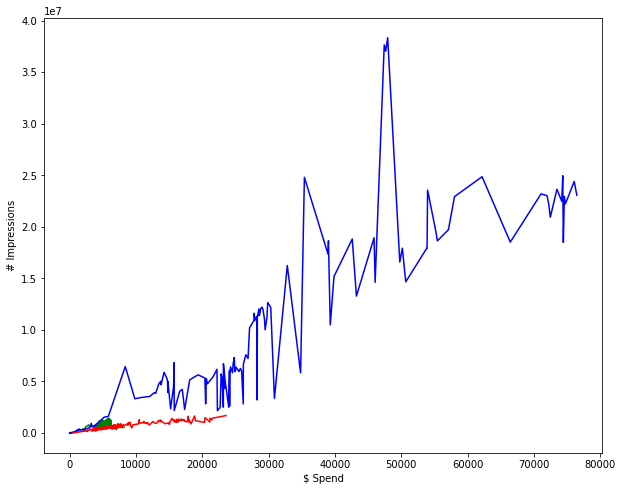

In [ ]:
ax = plt.subplots(figsize = (10,8))
ax = sns.lineplot(x= df_socialbydate['$ Spend'], y = df_socialbydate['# Impressions'], color = "g")
ax = sns.lineplot(x= df_progbydate['$ Spend'], y = df_progbydate['# Impressions'], color = "b")
ax = sns.lineplot(x= df_sbydate['$ Spend'], y = df_sbydate['# Impressions'], color = "r")

plt.show()

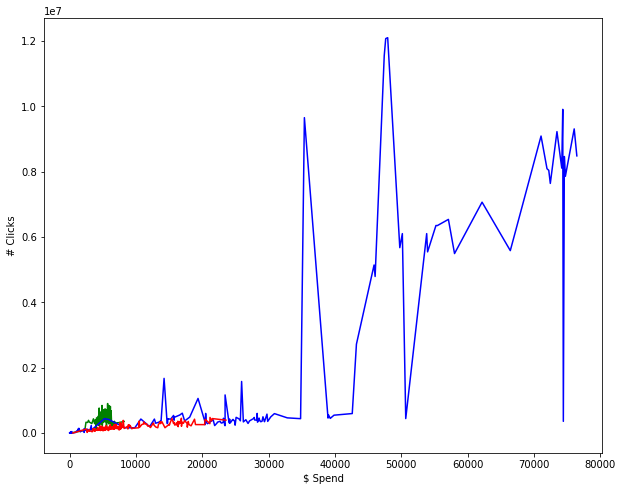

In [ ]:
ax = plt.subplots(figsize = (10,8))
ax = sns.lineplot(x= df_socialbydate['$ Spend'], y = df_socialbydate['# Clicks'], color = "g")
ax = sns.lineplot(x= df_progbydate['$ Spend'], y = df_progbydate['# Clicks'], color = "b")
ax = sns.lineplot(x= df_sbydate['$ Spend'], y = df_sbydate['# Clicks'], color = "r")

plt.show()

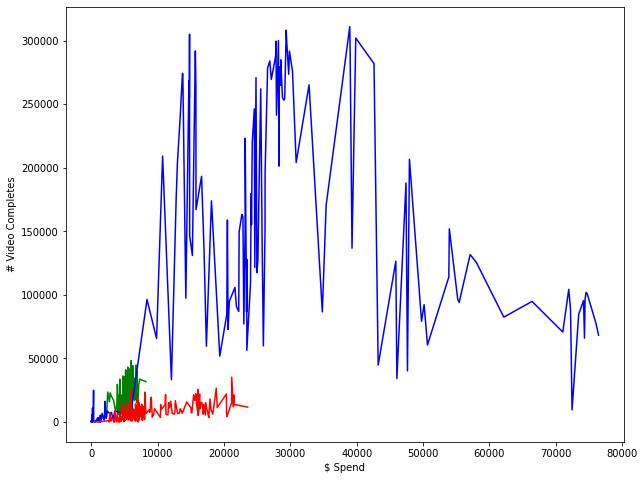

In [ ]:
ax = plt.subplots(figsize = (10,8))
ax = sns.lineplot(x= df_socialbydate['$ Spend'], y = df_socialbydate['# Video Completes'], color = "g")
ax = sns.lineplot(x= df_progbydate['$ Spend'], y = df_progbydate['# Video Completes'], color = "b")
ax = sns.lineplot(x= df_sbydate['$ Spend'], y = df_sbydate['# Video Completes'], color = "r")

plt.show()

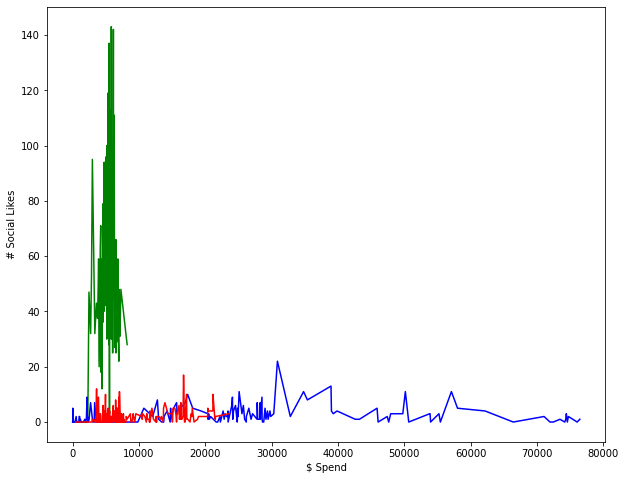

In [ ]:
ax = plt.subplots(figsize = (10,8))
ax = sns.lineplot(x= df_socialbydate['$ Spend'], y = df_socialbydate['# Social Likes'], color = "g")
ax = sns.lineplot(x= df_progbydate['$ Spend'], y = df_progbydate['# Social Likes'], color = "b")
ax = sns.lineplot(x= df_sbydate['$ Spend'], y = df_sbydate['# Social Likes'], color = "r")

plt.show()

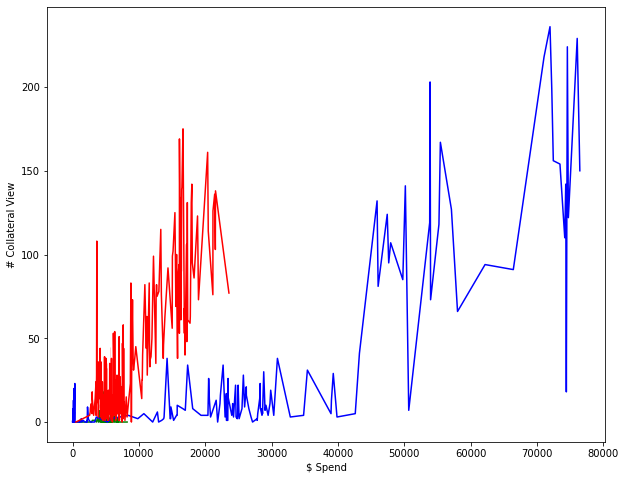

In [ ]:
ax = plt.subplots(figsize = (10,8))
ax = sns.lineplot(x= df_socialbydate['$ Spend'], y = df_socialbydate['# Collateral View'], color = "g")
ax = sns.lineplot(x= df_progbydate['$ Spend'], y = df_progbydate['# Collateral View'], color = "b")
ax = sns.lineplot(x= df_sbydate['$ Spend'], y = df_sbydate['# Collateral View'], color = "r")
plt.show()

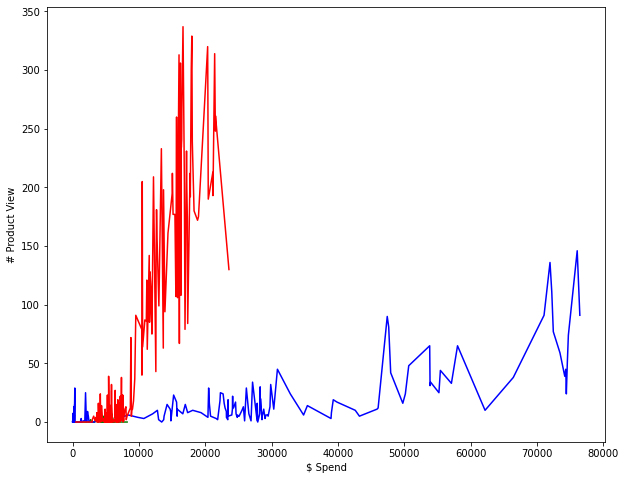

In [ ]:
ax = plt.subplots(figsize = (10,8))
ax = sns.lineplot(x= df_socialbydate['$ Spend'], y = df_socialbydate['# Product View'], color = "g")
ax = sns.lineplot(x= df_progbydate['$ Spend'], y = df_progbydate['# Product View'], color = "b")
ax = sns.lineplot(x= df_sbydate['$ Spend'], y = df_sbydate['# Product View'], color = "r")
plt.show()

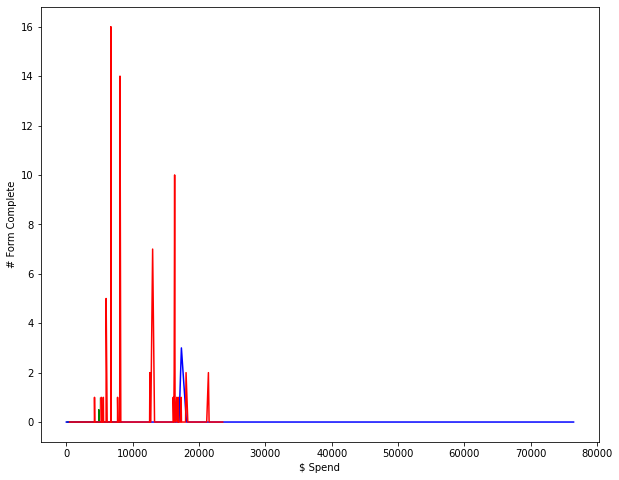

In [ ]:
ax = plt.subplots(figsize = (10,8))
ax = sns.lineplot(x= df_socialbydate['$ Spend'], y = df_socialbydate['# Form Complete'], color = "g")
ax = sns.lineplot(x= df_progbydate['$ Spend'], y = df_progbydate['# Form Complete'], color = "b")
ax = sns.lineplot(x= df_sbydate['$ Spend'], y = df_sbydate['# Form Complete'], color = "r")
plt.show()

In [ ]:
df_aud1 = df[ df['Audience Type'] == "Audience Type 1"]
df_aud1bd = df_aud1.groupby("Date").sum()
df_aud2 = df[ df['Audience Type'] == "Audience Type 2"]
df_aud2bd = df_aud2.groupby("Date").sum()
df_aud3 = df[ df['Audience Type'] == "Audience Type 3"]
df_aud3bd = df_aud3.groupby("Date").sum()
df_aud4 = df[ df['Audience Type'] == "Audience Type 4"]
df_aud4bd = df_aud4.groupby("Date").sum()
df_aud5 = df[ df['Audience Type'] == "Audience Type 5"]
df_aud5bd = df_aud5.groupby("Date").sum()

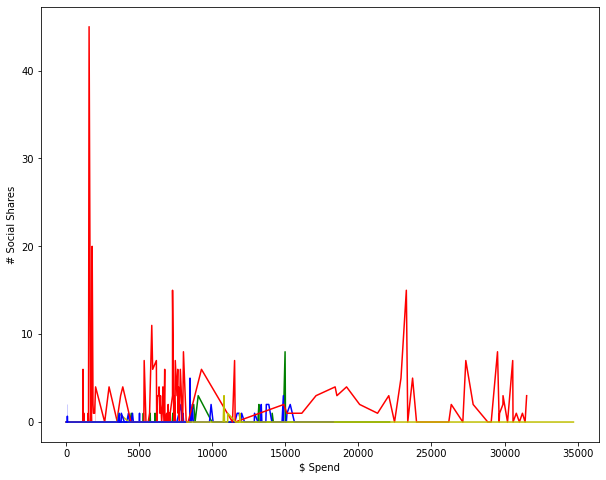

In [ ]:
ax = plt.subplots(figsize = (10,8))
ax = sns.lineplot(x= df_aud1bd['$ Spend'], y = df_aud1bd['# Social Shares'], color = "g")
ax = sns.lineplot(x= df_aud2bd['$ Spend'], y = df_aud2bd['# Social Shares'], color = "b")
ax = sns.lineplot(x= df_aud3bd['$ Spend'], y = df_aud3bd['# Social Shares'], color = "r")
ax = sns.lineplot(x= df_aud4bd['$ Spend'], y = df_aud4bd['# Social Shares'], color = "y")
ax = sns.lineplot(x= df_aud5bd['$ Spend'], y = df_aud5bd['# Social Shares'], color = "b")
plt.show()

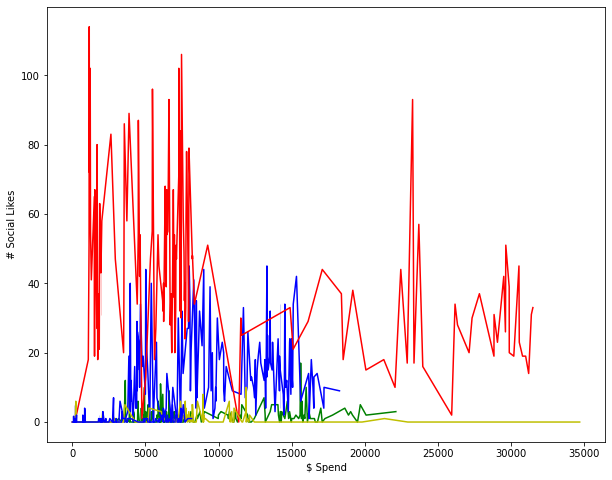

In [ ]:
 ax = plt.subplots(figsize = (10,8))
ax = sns.lineplot(x= df_aud1bd['$ Spend'], y = df_aud1bd['# Social Likes'], color = "g")
ax = sns.lineplot(x= df_aud2bd['$ Spend'], y = df_aud2bd['# Social Likes'], color = "b")
ax = sns.lineplot(x= df_aud3bd['$ Spend'], y = df_aud3bd['# Social Likes'], color = "r")
ax = sns.lineplot(x= df_aud4bd['$ Spend'], y = df_aud4bd['# Social Likes'], color = "y")
ax = sns.lineplot(x= df_aud5bd['$ Spend'], y = df_aud5bd['# Social Likes'], color = "b")
plt.show()

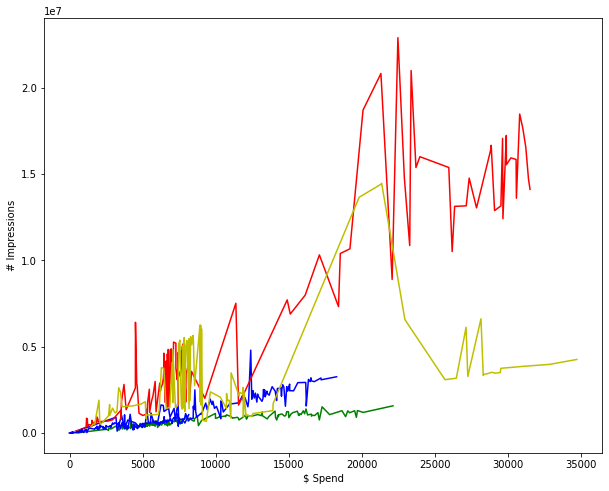

In [ ]:
ax = plt.subplots(figsize = (10,8))
ax = sns.lineplot(x= df_aud1bd['$ Spend'], y = df_aud1bd['# Impressions'], color = "g")
ax = sns.lineplot(x= df_aud2bd['$ Spend'], y = df_aud2bd['# Impressions'], color = "b")
ax = sns.lineplot(x= df_aud3bd['$ Spend'], y = df_aud3bd['# Impressions'], color = "r")
ax = sns.lineplot(x= df_aud4bd['$ Spend'], y = df_aud4bd['# Impressions'], color = "y")
ax = sns.lineplot(x= df_aud5bd['$ Spend'], y = df_aud5bd['# Impressions'], color = "b")
plt.show()

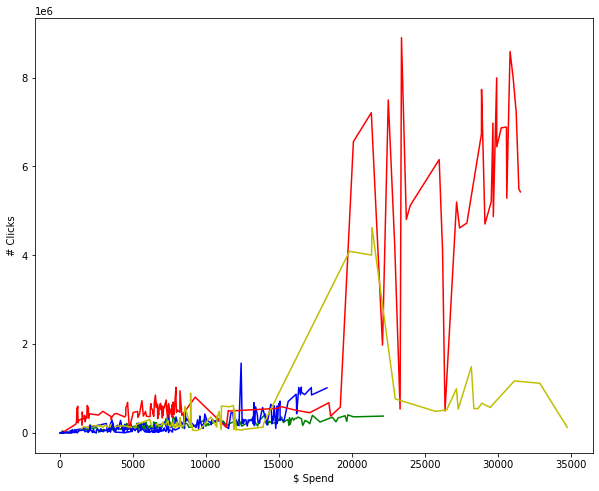

In [ ]:
ax = plt.subplots(figsize = (10,8))
ax = sns.lineplot(x= df_aud1bd['$ Spend'], y = df_aud1bd['# Clicks'], color = "g")
ax = sns.lineplot(x= df_aud2bd['$ Spend'], y = df_aud2bd['# Clicks'], color = "b")
ax = sns.lineplot(x= df_aud3bd['$ Spend'], y = df_aud3bd['# Clicks'], color = "r")
ax = sns.lineplot(x= df_aud4bd['$ Spend'], y = df_aud4bd['# Clicks'], color = "y")
ax = sns.lineplot(x= df_aud5bd['$ Spend'], y = df_aud5bd['# Clicks'], color = "b")
plt.show()

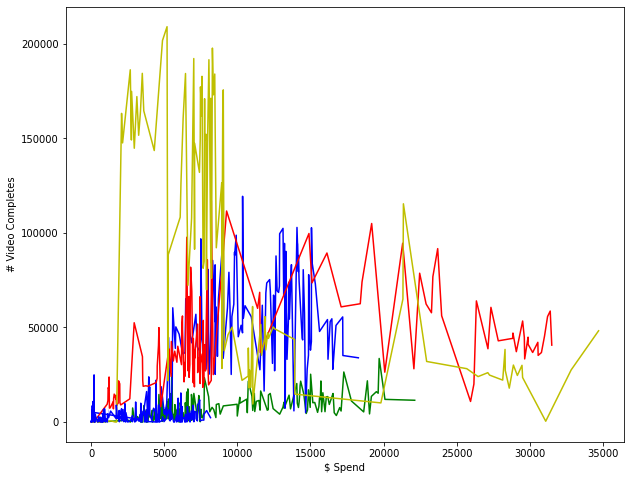

In [ ]:
ax = plt.subplots(figsize = (10,8))
ax = sns.lineplot(x= df_aud1bd['$ Spend'], y = df_aud1bd['# Video Completes'], color = "g")
ax = sns.lineplot(x= df_aud2bd['$ Spend'], y = df_aud2bd['# Video Completes'], color = "b")
ax = sns.lineplot(x= df_aud3bd['$ Spend'], y = df_aud3bd['# Video Completes'], color = "r")
ax = sns.lineplot(x= df_aud4bd['$ Spend'], y = df_aud4bd['# Video Completes'], color = "y")
ax = sns.lineplot(x= df_aud5bd['$ Spend'], y = df_aud5bd['# Video Completes'], color = "b")
plt.show()

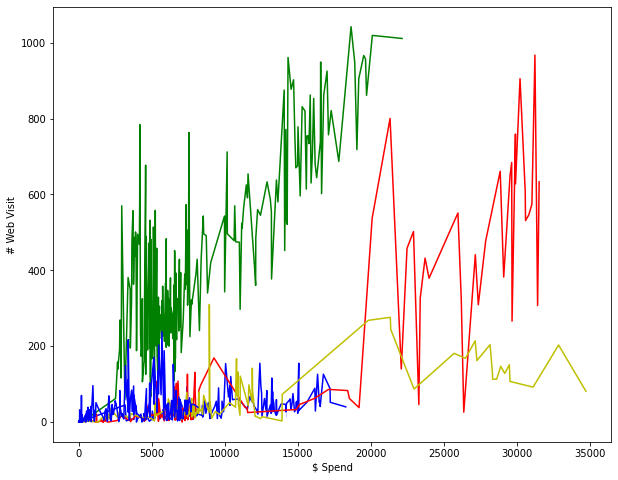

In [ ]:
ax = plt.subplots(figsize = (10,8))
ax = sns.lineplot(x= df_aud1bd['$ Spend'], y = df_aud1bd['# Web Visit'], color = "g")
ax = sns.lineplot(x= df_aud2bd['$ Spend'], y = df_aud2bd['# Web Visit'], color = "b")
ax = sns.lineplot(x= df_aud3bd['$ Spend'], y = df_aud3bd['# Web Visit'], color = "r")
ax = sns.lineplot(x= df_aud4bd['$ Spend'], y = df_aud4bd['# Web Visit'], color = "y")
ax = sns.lineplot(x= df_aud5bd['$ Spend'], y = df_aud5bd['# Web Visit'], color = "b")
plt.show()

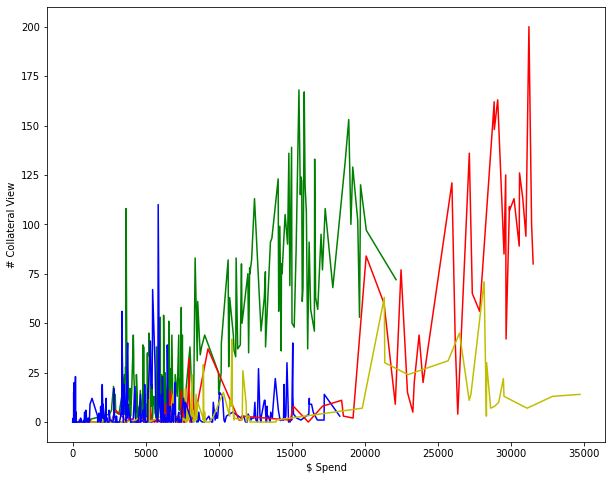

In [ ]:
ax = plt.subplots(figsize = (10,8))
ax = sns.lineplot(x= df_aud1bd['$ Spend'], y = df_aud1bd['# Collateral View'], color = "g")
ax = sns.lineplot(x= df_aud2bd['$ Spend'], y = df_aud2bd['# Collateral View'], color = "b")
ax = sns.lineplot(x= df_aud3bd['$ Spend'], y = df_aud3bd['# Collateral View'], color = "r")
ax = sns.lineplot(x= df_aud4bd['$ Spend'], y = df_aud4bd['# Collateral View'], color = "y")
ax = sns.lineplot(x= df_aud5bd['$ Spend'], y = df_aud5bd['# Collateral View'], color = "b")
plt.show()

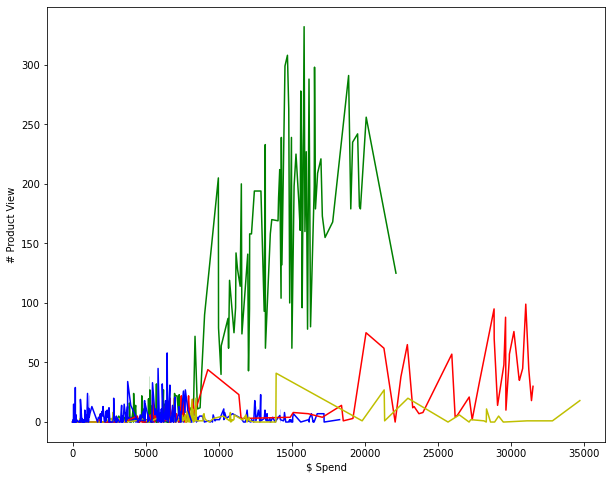

In [ ]:
ax = plt.subplots(figsize = (10,8))
ax = sns.lineplot(x= df_aud1bd['$ Spend'], y = df_aud1bd['# Product View'], color = "g")
ax = sns.lineplot(x= df_aud2bd['$ Spend'], y = df_aud2bd['# Product View'], color = "b")
ax = sns.lineplot(x= df_aud3bd['$ Spend'], y = df_aud3bd['# Product View'], color = "r")
ax = sns.lineplot(x= df_aud4bd['$ Spend'], y = df_aud4bd['# Product View'], color = "y")
ax = sns.lineplot(x= df_aud5bd['$ Spend'], y = df_aud5bd['# Product View'], color = "b")
plt.show()

# Audience Segmentation- Unsupervised learning classification

*For initial analysis, remove columns with null values*

In [ ]:
df_init = df.dropna(axis = 1, how= "any").drop(['Date'], axis = 1)
df_init.reset_index(inplace = True)

In [ ]:
## Encoding Ad Digital Channel, Ad chanel partner, Audience Type, Campaign Goal Code
def encoder(column_name):
  array = np.array(df_init.loc[:, column_name])
  lbe = preprocessing.LabelEncoder()
  ohe = preprocessing.OneHotEncoder()
  X = lbe.fit_transform(array) 
  X = ohe.fit_transform(X.reshape(-1,1)).toarray() 
  X = pd.DataFrame(X)

  for i in range(len(X.columns)):
    X.rename({i: lbe.classes_[i]}, inplace = True, axis = 1)
  return X

encoded_columns = ["Ad Digital Channel", "Ad channel partner", "Audience Type", "Campaign Goal Code"]

for i in encoded_columns:
  df_init = df_init.join(encoder(i))
  #df_init = df_init.drop(['index'], axis = 1)

df_init.drop(['index', 'Campaign Goal Code', 'Ad Digital Channel', 'Ad channel partner', 'Audience Type'], axis = 1, inplace = True)
df_init.columns

Index(['Campaign ID', 'Campaign Ad ID', '$ Spend', '# Impressions', '# Clicks',
       '# Video Completes', '# Social Likes', '# Social Shares', '# Web Visit',
       '# Collateral View', '# Product View', '# Form Complete',
       'Programmatic Display', 'Search', 'Social', 'Channel Partner 1',
       'Channel Partner 2', 'Channel Partner 3', 'Channel Partner 4',
       'Channel Partner 5', 'Channel Partner 6', 'Channel Partner 7',
       'Channel Partner 9', 'Audience Type 1', 'Audience Type 2',
       'Audience Type 3', 'Audience Type 4', 'Audience Type 5', 'Awareness',
       'Consideration', 'Engagement', 'Intent to Buy', 'Purchase'],
      dtype='object')

KNN MODEL

In [ ]:
# knn = cluster.KMeans(n_clusters = 5, max_iter = 2000)

# knn_res = knn.fit_transform(df_init)

# df_init['Labels'] = knn.labels_

DBSCAN MODEL

In [ ]:
# dbscan = cluster.DBSCAN()

# dbscan_res = dbscan.fit(df_init)

# df_init['Labels'] = dbscan.labels_

In [ ]:
df_init['Labels'].unique()

In [ ]:
df_init[ df_init['Labels']== 0]

###IN Vain, No fruitful results as the number of individual labels are too high hence, no fine boundaries!

Defining KPIS: </br>

1. Click through rate = CTR = clicks/Impressios
2. Completion rate= VCR= Video Completes/Impressions
3. Social Media Engagement Rate= SMER= Likes+Shares/Impressions
4. Conversion Rate- For Goal Code = Engagement= Web visits/Impressions
5. Conversion Rate- For Goal Code = Awareness = Collateral View/Impressions
6. Conversion Rate- For Goal Code = Intent to Buy = Product View/Impressions
7. Conversion Rate- For Goal Code = Consideration = Forms Complete/Impressions
8. Conversion Rate- For Goal Code = Purchase = Delete rows as there is not enough data to judge such campaigns and there are just 444 such rows 
9. Cost Per Action = Spend/ Sum of all actions on the website
10. Cost Per Click = Spend/ # Clicks

In [ ]:
df = df[ df['Campaign Goal Code'] != "Purchase"]
df = df[ df['# Impressions'] != 0]

In [ ]:
def ConversionRate(x):
  
  if x[2] == "Engagement" :
    return x[17]/x[12]
  elif x[2] == "Awareness" :
    return x[18]/x[12]
  elif x[2] == "Intent to Buy" :
    return x[19]/x[12]
  elif x[2] == "Consideration" :
    return x[20]/x[12]

def ExcessReturns(x):

  if x[2] == "Engagement" :
    return (x[18] + x[19] + x[20])/x[12]
  elif x[2] == "Awareness" :
    return (x[17] + x[19] + x[20])/x[12]
  elif x[2] == "Intent to Buy" :
    return (x[17] + x[18] + x[20])/x[12]
  elif x[2] == "Consideration" :
    return (x[17] + x[18] + x[19])/x[12]
  

In [ ]:
df['CTR'] = df['# Clicks']/df['# Impressions']
df['VCR'] = df['# Video Completes']/df['# Impressions']
df['SMER'] = (df['# Social Likes'] + df['# Social Shares'])/df['# Impressions']
df['CR'] = df.apply(ConversionRate, axis = 1)
df['ER'] = df.apply(ExcessReturns, axis = 1)
df['CPC'] = df['$ Spend']/df['# Clicks']
df['CPA'] = df['$ Spend'] / (df['CR'] * df['# Impressions'])

df.replace([np.inf, -np.inf], 0, inplace=True)

<ipython-input-69-88dc17783c72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CTR'] = df['# Clicks']/df['# Impressions']
<ipython-input-69-88dc17783c72>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VCR'] = df['# Video Completes']/df['# Impressions']
<ipython-input-69-88dc17783c72>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

### Checking for effect of time on CR for each campaign ID and then for each

In [ ]:
df['Datetime'] = df.apply(lambda x : datetime.strptime(x['Date'], "%m/%d/%Y"), axis = 1)

In [ ]:
(df.loc[4, 'Datetime'] - df.loc[1, 'Datetime']).days

28

In [ ]:
Days_ss = {}

for j in range(1,6):
  days_ss = []
  current_df = df[ df['Campaign ID'] == j]
  current_df = current_df.sort_values(by = 'Datetime', axis = 0)
  for i in range(len(current_df)):
    if i == 0:
      datetime_first = current_df.iloc[i, -1]
      days_ss.append(1)
    else:
      datetime = current_df.iloc[i, -1]
      if datetime == datetime_first:
        days_ss.append(1)
      else:
        current_day = (datetime - datetime_first).days
        days_ss.append(current_day)
  
  current_df['Days_ss'] = days_ss
  Days_ss['Campaign ID ' + str(j)] = current_df

    

<AxesSubplot:xlabel='Days_ss', ylabel='CR'>

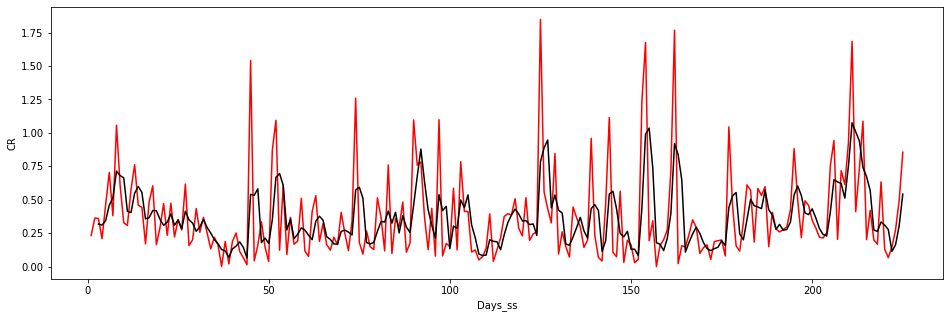

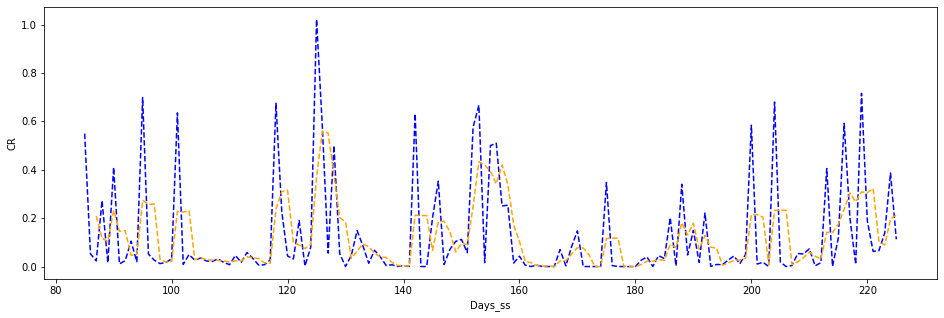

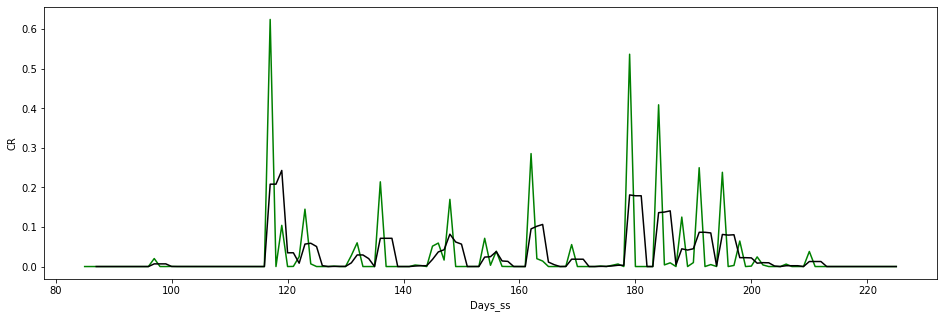

In [ ]:
ID5 = Days_ss['Campaign ID 1']
ID5search = ID5[ ID5['Ad Digital Channel'] == "Search"]
ID5search = ID5search.groupby("Days_ss").sum()
ID5search['7day_rolling_avg'] = ID5search.CR.rolling(3).mean()
ID5search.reset_index(inplace= True)
plt.figure(figsize= (16, 5))
sns.lineplot(x = ID5search['Days_ss'], y = ID5search['CR'], color = "red") 
sns.lineplot(x = ID5search['Days_ss'], y = ID5search['7day_rolling_avg'], color = "black")

ID5pd = ID5[ ID5['Ad Digital Channel'] == "Programmatic Display"]
ID5pd = ID5pd.groupby("Days_ss").sum()
ID5pd['7day_rolling_avg'] = ID5pd.CR.rolling(3).mean()
ID5pd.reset_index(inplace= True)
plt.figure(figsize= (16, 5))
sns.lineplot(x = ID5pd['Days_ss'], y = ID5pd['CR'], color = "blue", linestyle= "--") 
sns.lineplot(x = ID5pd['Days_ss'], y = ID5pd['7day_rolling_avg'], color = "orange", linestyle = "--")

ID5social = ID5[ ID5['Ad Digital Channel'] == "Social"]
ID5social = ID5social.groupby("Days_ss").sum()
ID5social['7day_rolling_avg'] = ID5social.CR.rolling(3).mean()
ID5social.reset_index(inplace= True)
plt.figure(figsize= (16, 5))
sns.lineplot(x = ID5social['Days_ss'], y = ID5social['CR'], color = "green") 
sns.lineplot(x = ID5social['Days_ss'], y = ID5social['7day_rolling_avg'], color = "black")

<AxesSubplot:xlabel='Days_ss', ylabel='CR'>

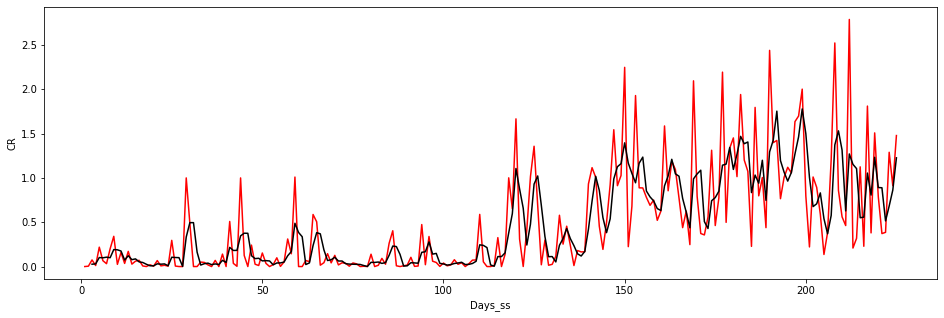

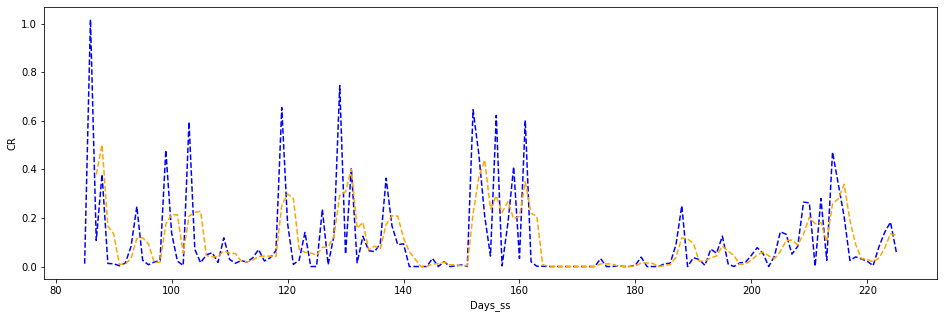

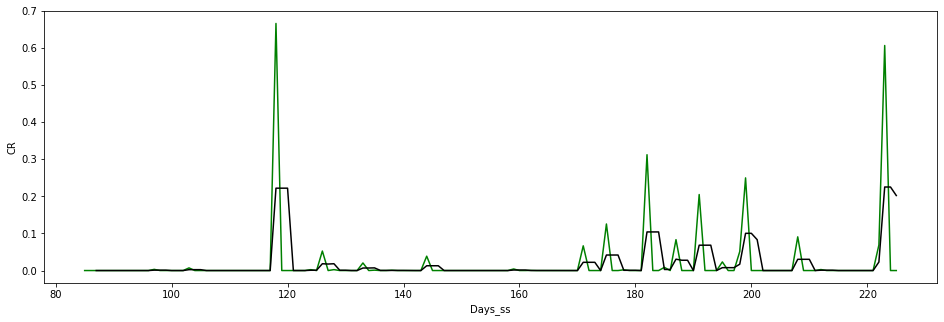

In [ ]:
ID5 = Days_ss['Campaign ID 2']
ID5search = ID5[ ID5['Ad Digital Channel'] == "Search"]
ID5search = ID5search.groupby("Days_ss").sum()
ID5search['7day_rolling_avg'] = ID5search.CR.rolling(3).mean()
ID5search.reset_index(inplace= True)
plt.figure(figsize= (16, 5))
sns.lineplot(x = ID5search['Days_ss'], y = ID5search['CR'], color = "red") 
sns.lineplot(x = ID5search['Days_ss'], y = ID5search['7day_rolling_avg'], color = "black")

ID5pd = ID5[ ID5['Ad Digital Channel'] == "Programmatic Display"]
ID5pd = ID5pd.groupby("Days_ss").sum()
ID5pd['7day_rolling_avg'] = ID5pd.CR.rolling(3).mean()
ID5pd.reset_index(inplace= True)
plt.figure(figsize= (16, 5))
sns.lineplot(x = ID5pd['Days_ss'], y = ID5pd['CR'], color = "blue", linestyle= "--") 
sns.lineplot(x = ID5pd['Days_ss'], y = ID5pd['7day_rolling_avg'], color = "orange", linestyle = "--")

ID5social = ID5[ ID5['Ad Digital Channel'] == "Social"]
ID5social = ID5social.groupby("Days_ss").sum()
ID5social['7day_rolling_avg'] = ID5social.CR.rolling(3).mean()
ID5social.reset_index(inplace= True)
plt.figure(figsize= (16, 5))
sns.lineplot(x = ID5social['Days_ss'], y = ID5social['CR'], color = "green") 
sns.lineplot(x = ID5social['Days_ss'], y = ID5social['7day_rolling_avg'], color = "black")

<AxesSubplot:xlabel='Days_ss', ylabel='CR'>

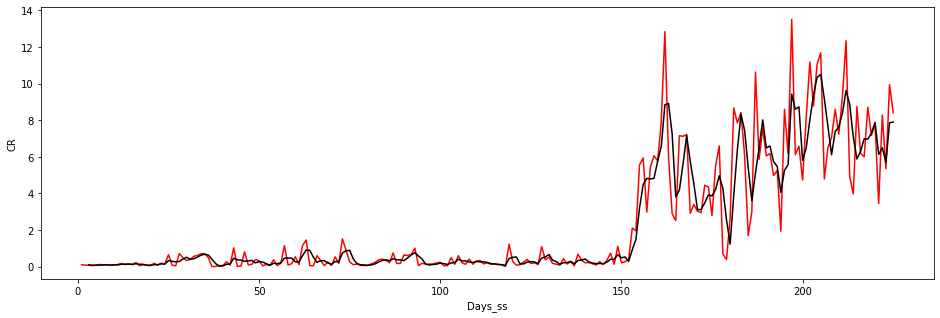

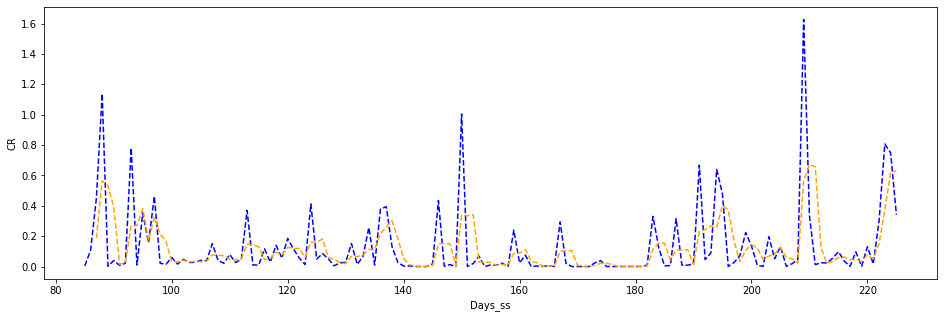

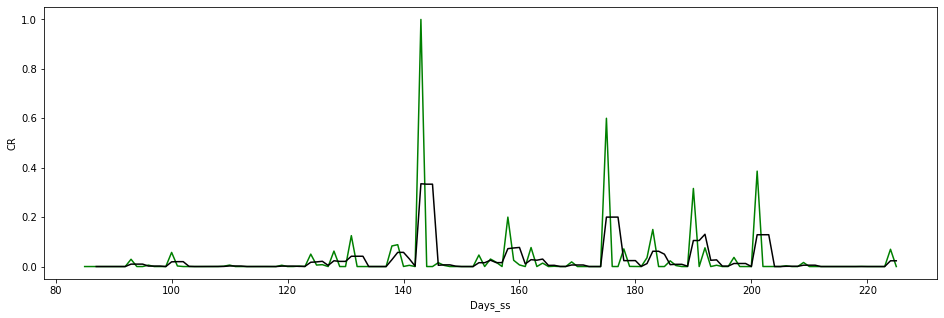

In [ ]:
ID5 = Days_ss['Campaign ID 3']
ID5search = ID5[ ID5['Ad Digital Channel'] == "Search"]
ID5search = ID5search.groupby("Days_ss").sum()
ID5search['7day_rolling_avg'] = ID5search.CR.rolling(3).mean()
ID5search.reset_index(inplace= True)
plt.figure(figsize= (16, 5))
sns.lineplot(x = ID5search['Days_ss'], y = ID5search['CR'], color = "red") 
sns.lineplot(x = ID5search['Days_ss'], y = ID5search['7day_rolling_avg'], color = "black")

ID5pd = ID5[ ID5['Ad Digital Channel'] == "Programmatic Display"]
ID5pd = ID5pd.groupby("Days_ss").sum()
ID5pd['7day_rolling_avg'] = ID5pd.CR.rolling(3).mean()
ID5pd.reset_index(inplace= True)
plt.figure(figsize= (16, 5))
sns.lineplot(x = ID5pd['Days_ss'], y = ID5pd['CR'], color = "blue", linestyle= "--") 
sns.lineplot(x = ID5pd['Days_ss'], y = ID5pd['7day_rolling_avg'], color = "orange", linestyle = "--")

ID5social = ID5[ ID5['Ad Digital Channel'] == "Social"]
ID5social = ID5social.groupby("Days_ss").sum()
ID5social['7day_rolling_avg'] = ID5social.CR.rolling(3).mean()
ID5social.reset_index(inplace= True)
plt.figure(figsize= (16, 5))
sns.lineplot(x = ID5social['Days_ss'], y = ID5social['CR'], color = "green") 
sns.lineplot(x = ID5social['Days_ss'], y = ID5social['7day_rolling_avg'], color = "black")

<AxesSubplot:xlabel='Days_ss', ylabel='CR'>

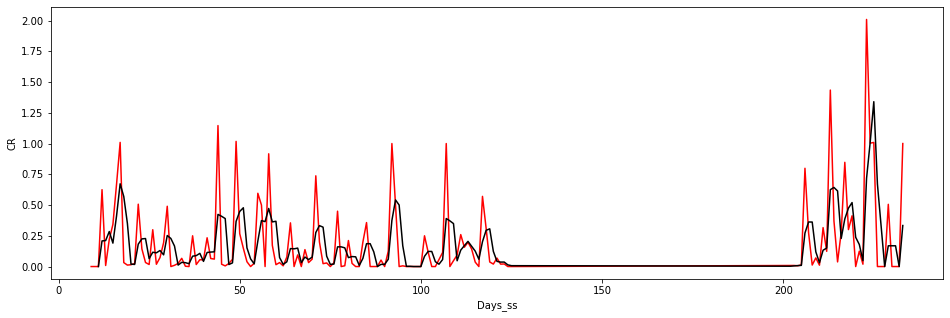

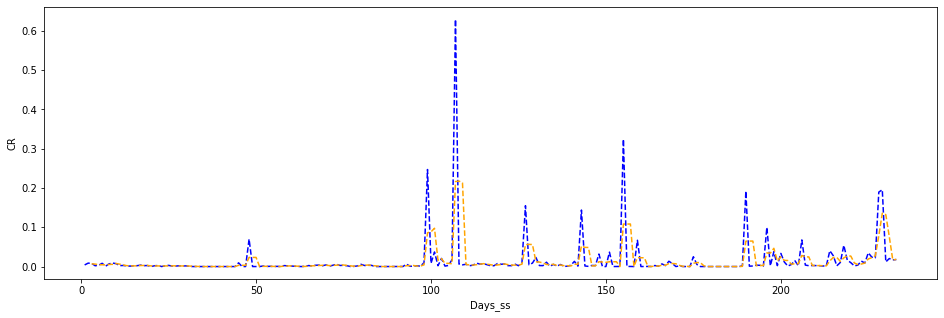

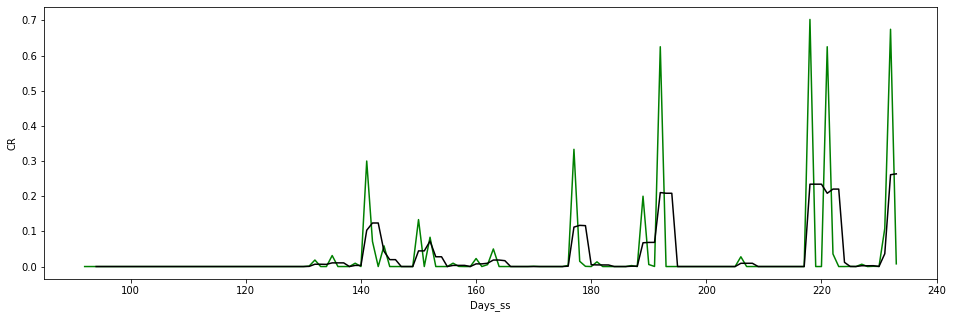

In [ ]:
ID5 = Days_ss['Campaign ID 4']
ID5search = ID5[ ID5['Ad Digital Channel'] == "Search"]
ID5search = ID5search.groupby("Days_ss").sum()
ID5search['7day_rolling_avg'] = ID5search.CR.rolling(3).mean()
ID5search.reset_index(inplace= True)
plt.figure(figsize= (16, 5))
sns.lineplot(x = ID5search['Days_ss'], y = ID5search['CR'], color = "red") 
sns.lineplot(x = ID5search['Days_ss'], y = ID5search['7day_rolling_avg'], color = "black")

ID5pd = ID5[ ID5['Ad Digital Channel'] == "Programmatic Display"]
ID5pd = ID5pd.groupby("Days_ss").sum()
ID5pd['7day_rolling_avg'] = ID5pd.CR.rolling(3).mean()
ID5pd.reset_index(inplace= True)
plt.figure(figsize= (16, 5))
sns.lineplot(x = ID5pd['Days_ss'], y = ID5pd['CR'], color = "blue", linestyle= "--") 
sns.lineplot(x = ID5pd['Days_ss'], y = ID5pd['7day_rolling_avg'], color = "orange", linestyle = "--")

ID5social = ID5[ ID5['Ad Digital Channel'] == "Social"]
ID5social = ID5social.groupby("Days_ss").sum()
ID5social['7day_rolling_avg'] = ID5social.CR.rolling(3).mean()
ID5social.reset_index(inplace= True)
plt.figure(figsize= (16, 5))
sns.lineplot(x = ID5social['Days_ss'], y = ID5social['CR'], color = "green") 
sns.lineplot(x = ID5social['Days_ss'], y = ID5social['7day_rolling_avg'], color = "black")

<AxesSubplot:xlabel='Days_ss', ylabel='CR'>

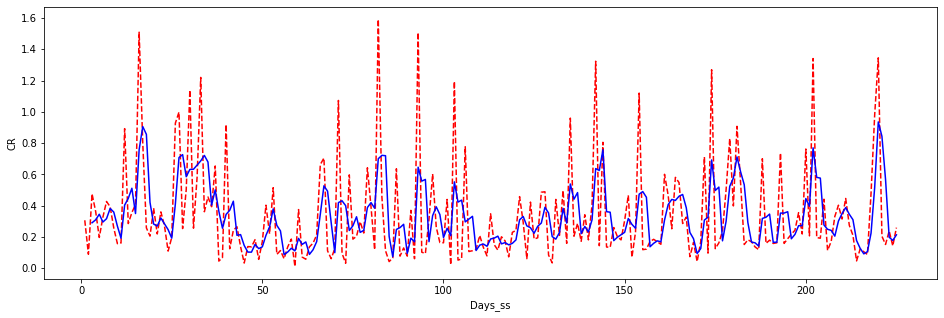

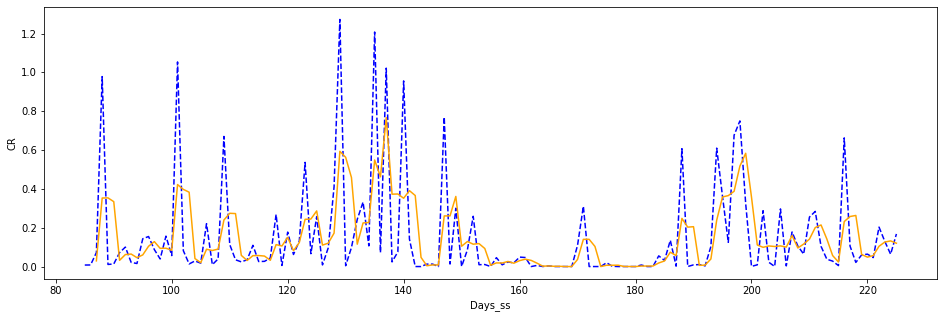

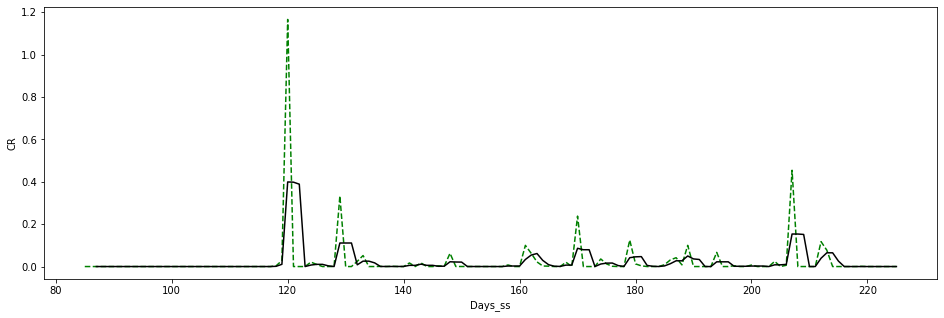

In [ ]:
ID5 = Days_ss['Campaign ID 5']
ID5search = ID5[ ID5['Ad Digital Channel'] == "Search"]
ID5search = ID5search.groupby("Days_ss").sum()
ID5search['7day_rolling_avg'] = ID5search.CR.rolling(3).mean()
ID5search.reset_index(inplace= True)
plt.figure(figsize= (16, 5))
sns.lineplot(x = ID5search['Days_ss'], y = ID5search['CR'], color = "red", linestyle = "--") 
sns.lineplot(x = ID5search['Days_ss'], y = ID5search['7day_rolling_avg'], color = "blue")

ID5pd = ID5[ ID5['Ad Digital Channel'] == "Programmatic Display"]
ID5pd = ID5pd.groupby("Days_ss").sum()
ID5pd['7day_rolling_avg'] = ID5pd.CR.rolling(3).mean()
ID5pd.reset_index(inplace= True)
plt.figure(figsize= (16, 5))
sns.lineplot(x = ID5pd['Days_ss'], y = ID5pd['CR'], color = "blue", linestyle= "--") 
sns.lineplot(x = ID5pd['Days_ss'], y = ID5pd['7day_rolling_avg'], color = "orange")

ID5social = ID5[ ID5['Ad Digital Channel'] == "Social"]
ID5social = ID5social.groupby("Days_ss").sum()
ID5social['7day_rolling_avg'] = ID5social.CR.rolling(3).mean()
ID5social.reset_index(inplace= True)
plt.figure(figsize= (16, 5))
sns.lineplot(x = ID5social['Days_ss'], y = ID5social['CR'], color = "green", linestyle = "--") 
sns.lineplot(x = ID5social['Days_ss'], y = ID5social['7day_rolling_avg'], color = "black")

Campaign 2 and 3 gain traction after 100 days into the campaign

## Checking for effect of content type

<AxesSubplot:xlabel='Days_ss', ylabel='CR'>

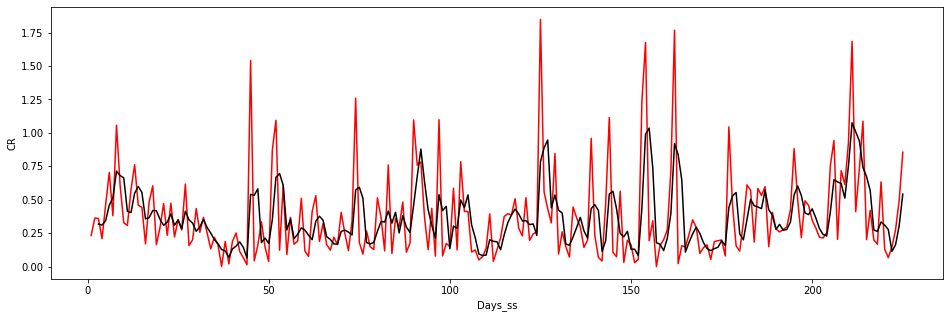

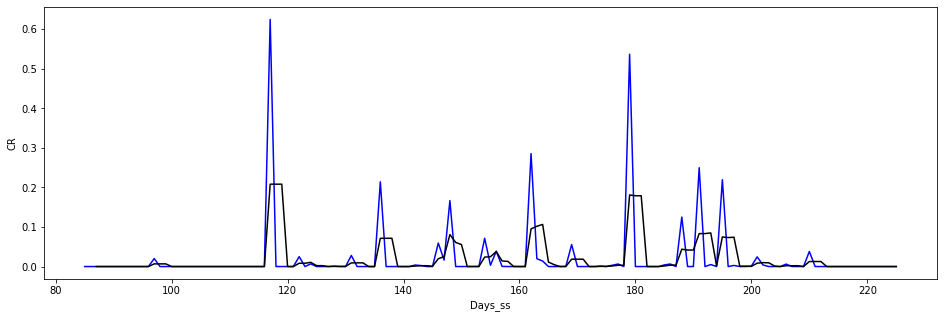

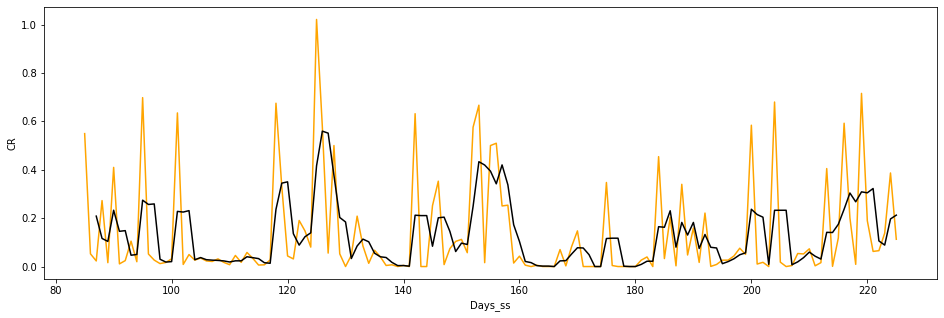

In [ ]:
id1 = Days_ss['Campaign ID 1']
id1text = id1[ id1['Ad Content Type']== "Text"]
id1text= id1text.groupby("Days_ss").sum()
id1text['7day_rolling_avg'] = id1text.CR.rolling(3).mean()
id1text.reset_index(inplace= True)
plt.figure(figsize= (16, 5))
sns.lineplot(x = id1text['Days_ss'], y = id1text['CR'], color = "red") 
sns.lineplot(x = id1text['Days_ss'], y = id1text['7day_rolling_avg'], color = "black")

id1 = Days_ss['Campaign ID 1']
id1text = id1[ id1['Ad Content Type']== "Image"]
id1text= id1text.groupby("Days_ss").sum()
id1text['7day_rolling_avg'] = id1text.CR.rolling(3).mean()
id1text.reset_index(inplace= True)
plt.figure(figsize= (16, 5))
sns.lineplot(x = id1text['Days_ss'], y = id1text['CR'], color = "blue") 
sns.lineplot(x = id1text['Days_ss'], y = id1text['7day_rolling_avg'], color = "black")

id1 = Days_ss['Campaign ID 1']
id1text = id1[ id1['Ad Content Type']== "Video"]
id1text= id1text.groupby("Days_ss").sum()
id1text['7day_rolling_avg'] = id1text.CR.rolling(3).mean()
id1text.reset_index(inplace= True)
plt.figure(figsize= (16, 5))
sns.lineplot(x = id1text['Days_ss'], y = id1text['CR'], color = "orange") 
sns.lineplot(x = id1text['Days_ss'], y = id1text['7day_rolling_avg'], color = "black")

<AxesSubplot:xlabel='Days_ss', ylabel='CR'>

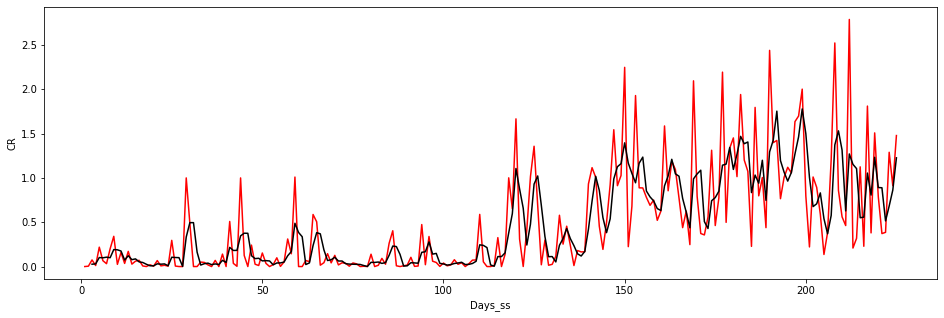

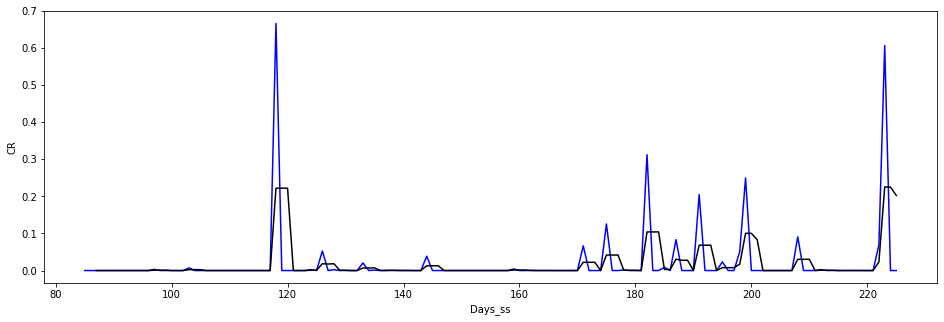

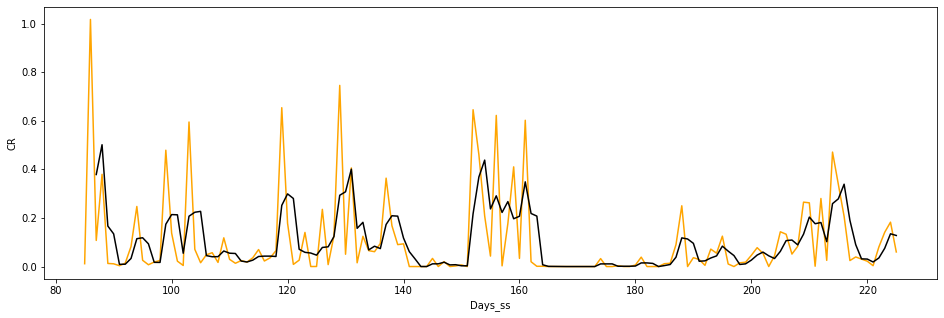

In [ ]:
id1 = Days_ss['Campaign ID 2']
id1text = id1[ id1['Ad Content Type']== "Text"]
id1text= id1text.groupby("Days_ss").sum()
id1text['7day_rolling_avg'] = id1text.CR.rolling(3).mean()
id1text.reset_index(inplace= True)
plt.figure(figsize= (16, 5))
sns.lineplot(x = id1text['Days_ss'], y = id1text['CR'], color = "red") 
sns.lineplot(x = id1text['Days_ss'], y = id1text['7day_rolling_avg'], color = "black")

id1text = id1[ id1['Ad Content Type']== "Image"]
id1text= id1text.groupby("Days_ss").sum()
id1text['7day_rolling_avg'] = id1text.CR.rolling(3).mean()
id1text.reset_index(inplace= True)
plt.figure(figsize= (16, 5))
sns.lineplot(x = id1text['Days_ss'], y = id1text['CR'], color = "blue") 
sns.lineplot(x = id1text['Days_ss'], y = id1text['7day_rolling_avg'], color = "black")

id1text = id1[ id1['Ad Content Type']== "Video"]
id1text= id1text.groupby("Days_ss").sum()
id1text['7day_rolling_avg'] = id1text.CR.rolling(3).mean()
id1text.reset_index(inplace= True)
plt.figure(figsize= (16, 5))
sns.lineplot(x = id1text['Days_ss'], y = id1text['CR'], color = "orange") 
sns.lineplot(x = id1text['Days_ss'], y = id1text['7day_rolling_avg'], color = "black")

<AxesSubplot:xlabel='Days_ss', ylabel='CR'>

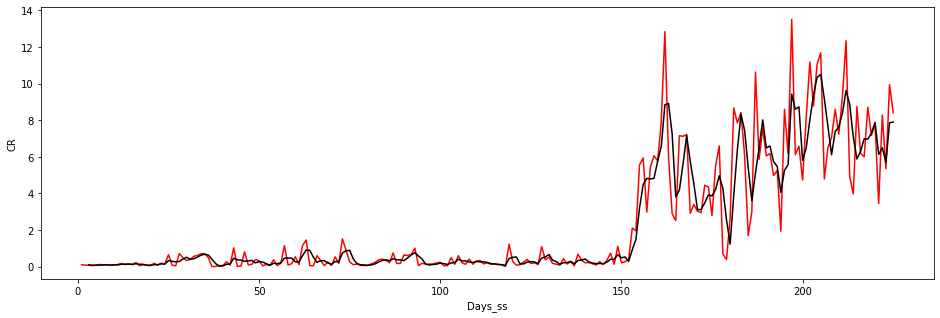

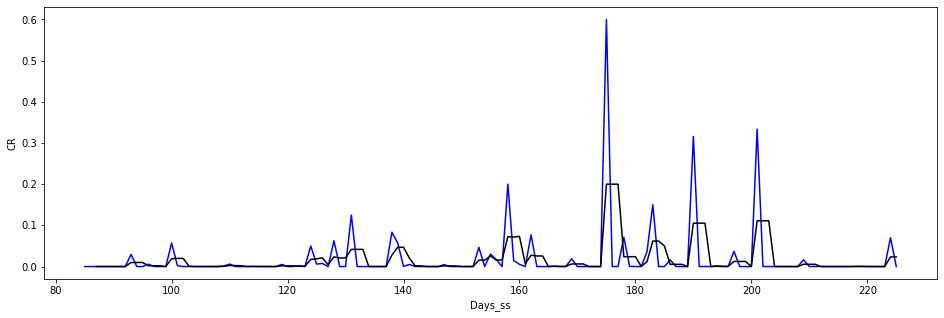

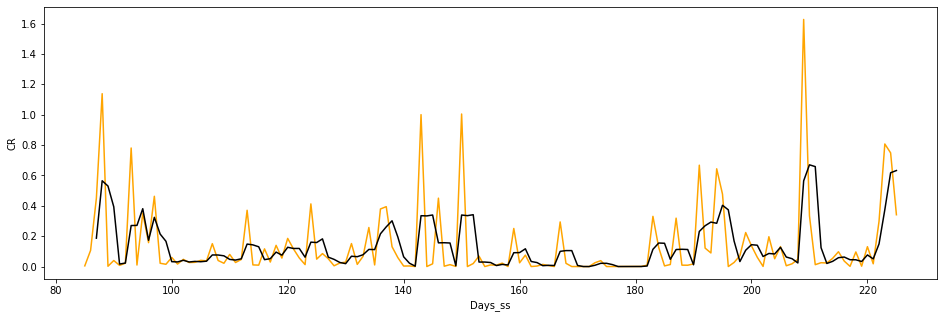

In [ ]:
id1 = Days_ss['Campaign ID 3']
id1text = id1[ id1['Ad Content Type']== "Text"]
id1text= id1text.groupby("Days_ss").sum()
id1text['7day_rolling_avg'] = id1text.CR.rolling(3).mean()
id1text.reset_index(inplace= True)
plt.figure(figsize= (16, 5))
sns.lineplot(x = id1text['Days_ss'], y = id1text['CR'], color = "red") 
sns.lineplot(x = id1text['Days_ss'], y = id1text['7day_rolling_avg'], color = "black")

id1text = id1[ id1['Ad Content Type']== "Image"]
id1text= id1text.groupby("Days_ss").sum()
id1text['7day_rolling_avg'] = id1text.CR.rolling(3).mean()
id1text.reset_index(inplace= True)
plt.figure(figsize= (16, 5))
sns.lineplot(x = id1text['Days_ss'], y = id1text['CR'], color = "blue") 
sns.lineplot(x = id1text['Days_ss'], y = id1text['7day_rolling_avg'], color = "black")

id1text = id1[ id1['Ad Content Type']== "Video"]
id1text= id1text.groupby("Days_ss").sum()
id1text['7day_rolling_avg'] = id1text.CR.rolling(3).mean()
id1text.reset_index(inplace= True)
plt.figure(figsize= (16, 5))
sns.lineplot(x = id1text['Days_ss'], y = id1text['CR'], color = "orange") 
sns.lineplot(x = id1text['Days_ss'], y = id1text['7day_rolling_avg'], color = "black")

<AxesSubplot:xlabel='Days_ss', ylabel='CR'>

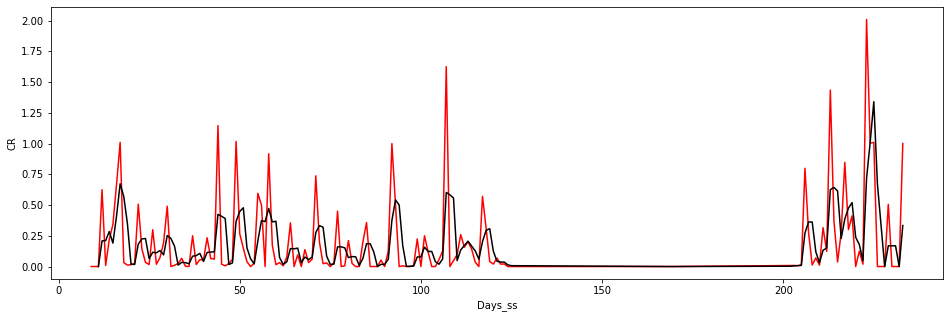

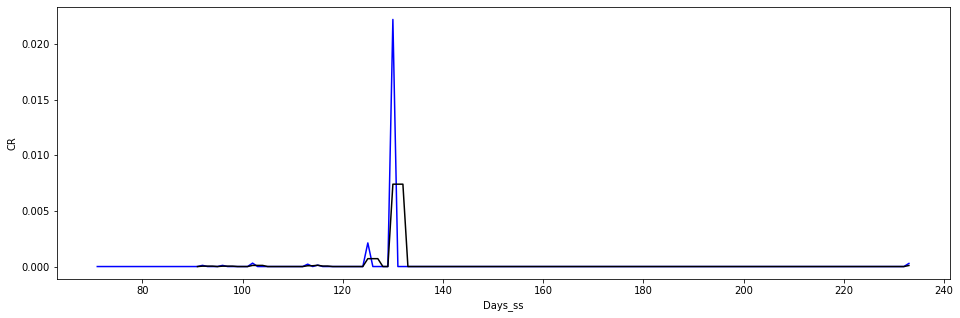

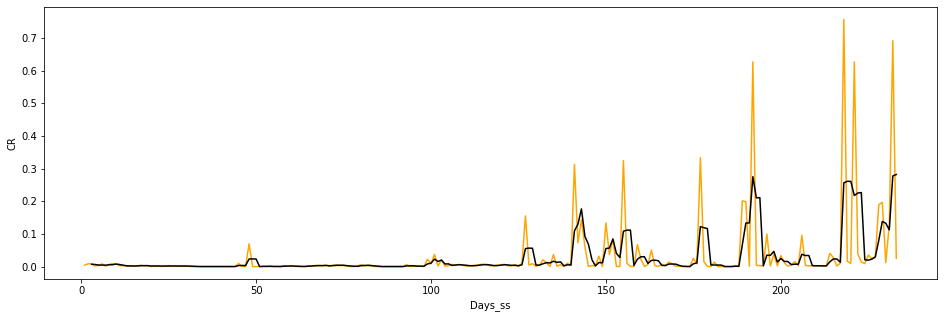

In [ ]:
id1 = Days_ss['Campaign ID 4']
id1text = id1[ id1['Ad Content Type']== "Text"]
id1text= id1text.groupby("Days_ss").sum()
id1text['7day_rolling_avg'] = id1text.CR.rolling(3).mean()
id1text.reset_index(inplace= True)
plt.figure(figsize= (16, 5))
sns.lineplot(x = id1text['Days_ss'], y = id1text['CR'], color = "red") 
sns.lineplot(x = id1text['Days_ss'], y = id1text['7day_rolling_avg'], color = "black")

id1text = id1[ id1['Ad Content Type']== "Image"]
id1text= id1text.groupby("Days_ss").sum()
id1text['7day_rolling_avg'] = id1text.CR.rolling(3).mean()
id1text.reset_index(inplace= True)
plt.figure(figsize= (16, 5))
sns.lineplot(x = id1text['Days_ss'], y = id1text['CR'], color = "blue") 
sns.lineplot(x = id1text['Days_ss'], y = id1text['7day_rolling_avg'], color = "black")

id1text = id1[ id1['Ad Content Type']== "Video"]
id1text= id1text.groupby("Days_ss").sum()
id1text['7day_rolling_avg'] = id1text.CR.rolling(3).mean()
id1text.reset_index(inplace= True)
plt.figure(figsize= (16, 5))
sns.lineplot(x = id1text['Days_ss'], y = id1text['CR'], color = "orange") 
sns.lineplot(x = id1text['Days_ss'], y = id1text['7day_rolling_avg'], color = "black")

<AxesSubplot:xlabel='Days_ss', ylabel='CR'>

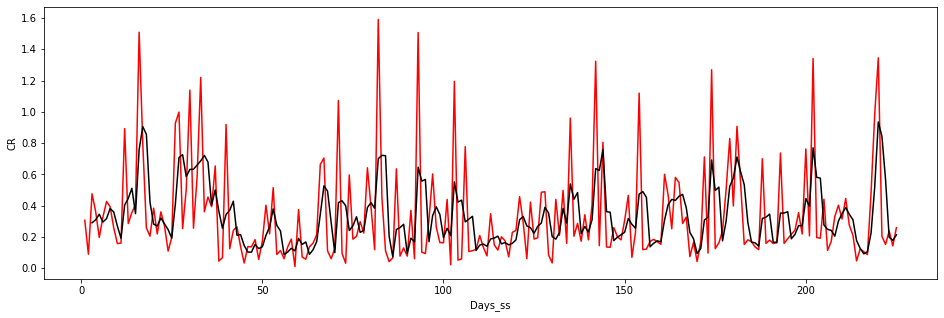

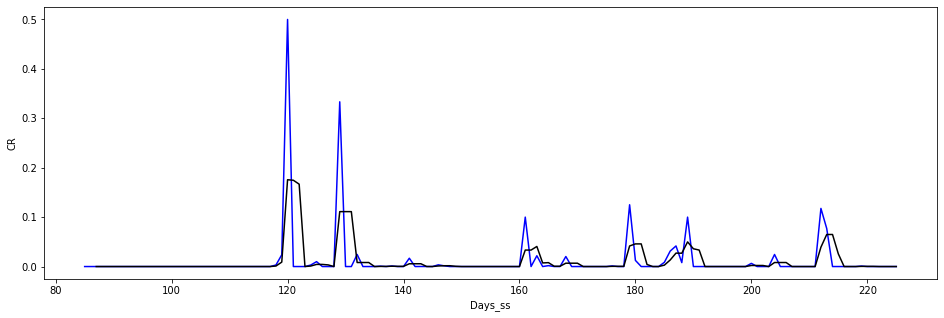

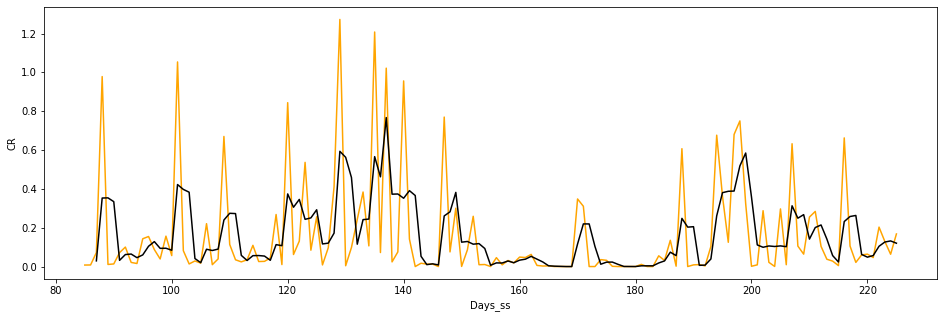

In [ ]:
id1 = Days_ss['Campaign ID 5']
id1text = id1[ id1['Ad Content Type']== "Text"]
id1text= id1text.groupby("Days_ss").sum()
id1text['7day_rolling_avg'] = id1text.CR.rolling(3).mean()
id1text.reset_index(inplace= True)
plt.figure(figsize= (16, 5))
sns.lineplot(x = id1text['Days_ss'], y = id1text['CR'], color = "red") 
sns.lineplot(x = id1text['Days_ss'], y = id1text['7day_rolling_avg'], color = "black")

id1text = id1[ id1['Ad Content Type']== "Image"]
id1text= id1text.groupby("Days_ss").sum()
id1text['7day_rolling_avg'] = id1text.CR.rolling(3).mean()
id1text.reset_index(inplace= True)
plt.figure(figsize= (16, 5))
sns.lineplot(x = id1text['Days_ss'], y = id1text['CR'], color = "blue") 
sns.lineplot(x = id1text['Days_ss'], y = id1text['7day_rolling_avg'], color = "black")

id1text = id1[ id1['Ad Content Type']== "Video"]
id1text= id1text.groupby("Days_ss").sum()
id1text['7day_rolling_avg'] = id1text.CR.rolling(3).mean()
id1text.reset_index(inplace= True)
plt.figure(figsize= (16, 5))
sns.lineplot(x = id1text['Days_ss'], y = id1text['CR'], color = "orange") 
sns.lineplot(x = id1text['Days_ss'], y = id1text['7day_rolling_avg'], color = "black")

Encode:
1. Date - In terms of Days since start of campaign
2. Campaign ID- Encode
3. Campaign Goal Code- Delete
4. Campaign Ad ID- Delete for now
5. Ad Digital Channel- Encode
6. Ad channel partner - Encode
7. Ad Device - Delete
8. Ad Group - Delete
9. Ad Content ID - Delete
10. Ad Content Type - Encode

### Prepare final data for modelling:

In [ ]:
df_final= pd.concat([Days_ss['Campaign ID 1'], Days_ss['Campaign ID 2'], Days_ss['Campaign ID 3'], Days_ss['Campaign ID 4'], Days_ss['Campaign ID 5']])
df_final.sort_index(inplace = True)
df_final.drop(['Date', 'Datetime', "Campaign Goal Code", "Campaign Ad ID", "Ad Device", "Ad Group", "Ad Content ID"], axis = 1, inplace = True)
df_final.dropna(axis = 0, inplace = True)

In [ ]:
def encoder(column_name):
  X = df_final
  array = np.array(df_final.loc[:, column_name])
  lbe = preprocessing.LabelEncoder()
  ohe = preprocessing.OneHotEncoder()
  labelled = lbe.fit_transform(array) 
  encoded = ohe.fit_transform(labelled.reshape(-1,1)).toarray() 
  
  for i in range(len(lbe.classes_)):
    X[column_name + " "+ str(lbe.classes_[i])] = encoded[:, i]
  
  return X

In [ ]:
for i in ['Campaign ID', "Ad Digital Channel", "Ad channel partner", "Ad Content Type", "Audience Type"]:
  df_final = encoder(i)

In [ ]:
 df_final.drop(['Campaign ID', "Ad Digital Channel", "Ad channel partner", "Ad Content Type", "Audience Type", "Campaign ID 1", "Ad Digital Channel Programmatic Display", "Ad channel partner Channel Partner 1", "Ad Content Type Image", "Audience Type Audience Type 1"], axis = 1, inplace= True)

In [ ]:
df_final.columns

Index(['$ Spend', '# Impressions', '# Clicks', '# Video Completes',
       '# Social Likes', '# Social Shares', '# Web Visit', '# Collateral View',
       '# Product View', '# Form Complete', 'CTR', 'VCR', 'SMER', 'CR', 'ER',
       'CPC', 'CPA', 'Days_ss', 'Campaign ID 2', 'Campaign ID 3',
       'Campaign ID 4', 'Campaign ID 5', 'Ad Digital Channel Search',
       'Ad Digital Channel Social', 'Ad channel partner Channel Partner 2',
       'Ad channel partner Channel Partner 3',
       'Ad channel partner Channel Partner 4',
       'Ad channel partner Channel Partner 5',
       'Ad channel partner Channel Partner 6',
       'Ad channel partner Channel Partner 7',
       'Ad channel partner Channel Partner 9', 'Ad Content Type Text',
       'Ad Content Type Video', 'Audience Type Audience Type 2',
       'Audience Type Audience Type 3', 'Audience Type Audience Type 4',
       'Audience Type Audience Type 5'],
      dtype='object')

In [ ]:
df_final.drop(['# Impressions', "# Clicks", "# Video Completes", "# Social Likes", "# Social Shares", "# Web Visit", "# Collateral View", "# Product View", "# Form Complete"], axis = 1, inplace= True)
df_final.to_csv("Final.csv")

In [ ]:
sns.pairplot(df_final)

#Modelling

In [ ]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api
import collections
from sklearn import preprocessing
from datetime import datetime
from sklearn import cluster
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.svm import SVC
! pip install sklego
from sklego.meta import ZeroInflatedRegressor
df_final = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HPE BA Competition/Final.csv")
metadata = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/HPE BA Competition/1_data_dictionary.xlsx")
df_final.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_final.head(10)

In [ ]:
sns.histplot(df_final['CTR'])

In [ ]:
sns.histplot(df_final['CR'])

In [ ]:
sns.histplot(df_final['ER'])

In [ ]:
sns.histplot(df_final['VCR'])

In [ ]:
plt.figure(figsize= (12,8))
sns.histplot(df_final['CR'], binwidth= 0.01)

In [ ]:
X = df_final.drop(['CPC', 'CPA', "CR", 'Ad channel partner Channel Partner 2',
       'Ad channel partner Channel Partner 3',
       'Ad channel partner Channel Partner 4',
       'Ad channel partner Channel Partner 5',
       'Ad channel partner Channel Partner 6',
       'Ad channel partner Channel Partner 7',
       'Ad channel partner Channel Partner 9', 'Campaign ID 2',
       'Campaign ID 3', 'Campaign ID 4', 'Campaign ID 5', 'Ad Content Type Text', 'Ad Content Type Video'], axis = 1)
y = df_final.CR

zero = ZeroInflatedRegressor(
    classifier= DecisionTreeClassifier(criterion= "log_loss"),
    regressor= LinearRegression()
)

zero.fit(X, y)

print(f" The R2 score is: {r2_score(y_pred = zero.predict(X), y_true = y)}")
print(f" The intercept for the model is: {zero.regressor_.intercept_}")
print(f" The coefficients for independent variables: {zero.regressor_.coef_}")

In [ ]:
X = df_final.drop(['CPC', 'CPA', "ER", 'Ad channel partner Channel Partner 2',
       'Ad channel partner Channel Partner 3',
       'Ad channel partner Channel Partner 4',
       'Ad channel partner Channel Partner 5',
       'Ad channel partner Channel Partner 6',
       'Ad channel partner Channel Partner 7',
       'Ad channel partner Channel Partner 9', 'Campaign ID 2',
       'Campaign ID 3', 'Campaign ID 4', 'Campaign ID 5', 'Ad Content Type Text', 'Ad Content Type Video'], axis = 1)
y = df_final.ER

zero = ZeroInflatedRegressor(
    classifier= DecisionTreeClassifier(criterion= "log_loss"),
    regressor= LinearRegression()
)

zero.fit(X, y)

print(f" The R2 score is: {r2_score(y_pred = zero.predict(X), y_true = y)}")
print(f" The intercept for the model is: {zero.regressor_.intercept_}")
print(f" The coefficients for independent variables: {zero.regressor_.coef_}")

In [ ]:
X = df_final.drop(['CPC', 'CPA', "VCR", 'Ad channel partner Channel Partner 2',
       'Ad channel partner Channel Partner 3',
       'Ad channel partner Channel Partner 4',
       'Ad channel partner Channel Partner 5',
       'Ad channel partner Channel Partner 6',
       'Ad channel partner Channel Partner 7',
       'Ad channel partner Channel Partner 9', 'Campaign ID 2',
       'Campaign ID 3', 'Campaign ID 4', 'Campaign ID 5', 'Ad Content Type Text', 'Ad Content Type Video'], axis = 1)
y = df_final.VCR

zero = ZeroInflatedRegressor(
    classifier= DecisionTreeClassifier(criterion= "log_loss"),
    regressor= LinearRegression()
)

zero.fit(X, y)

print(f" The R2 score is: {r2_score(y_pred = zero.predict(X), y_true = y)}")
print(f" The intercept for the model is: {zero.regressor_.intercept_}")
print(f" The coefficients for independent variables: {zero.regressor_.coef_}")

In [ ]:
X = df_final.drop(['CPC', 'CPA', "SMER", 'Ad channel partner Channel Partner 2',
       'Ad channel partner Channel Partner 3',
       'Ad channel partner Channel Partner 4',
       'Ad channel partner Channel Partner 5',
       'Ad channel partner Channel Partner 6',
       'Ad channel partner Channel Partner 7',
       'Ad channel partner Channel Partner 9', 'Campaign ID 2',
       'Campaign ID 3', 'Campaign ID 4', 'Campaign ID 5', 'Ad Content Type Text', 'Ad Content Type Video'], axis = 1)
y = df_final.SMER

zero = ZeroInflatedRegressor(
    classifier= DecisionTreeClassifier(criterion= "log_loss"),
    regressor= LinearRegression()
)

zero.fit(X, y)

print(f" The R2 score is: {r2_score(y_pred = zero.predict(X), y_true = y)}")
print(f" The intercept for the model is: {zero.regressor_.intercept_}")
print(f" The coefficients for independent variables: {zero.regressor_.coef_}")

In [ ]:
X = df_final.drop(['CPC', 'CPA', "CTR", 'Ad channel partner Channel Partner 2',
       'Ad channel partner Channel Partner 3',
       'Ad channel partner Channel Partner 4',
       'Ad channel partner Channel Partner 5',
       'Ad channel partner Channel Partner 6',
       'Ad channel partner Channel Partner 7',
       'Ad channel partner Channel Partner 9', 'Campaign ID 2',
       'Campaign ID 3', 'Campaign ID 4', 'Campaign ID 5', 'Ad Content Type Text', 'Ad Content Type Video'], axis = 1)
y = df_final.CTR

zero = ZeroInflatedRegressor(
    classifier= DecisionTreeClassifier(criterion= "log_loss"),
    regressor= LinearRegression()
)

zero.fit(X, y)

print(f" The R2 score is: {r2_score(y_pred = zero.predict(X), y_true = y)}")
print(f" The intercept for the model is: {zero.regressor_.intercept_}")
print(f" The coefficients for independent variables: {zero.regressor_.coef_}")